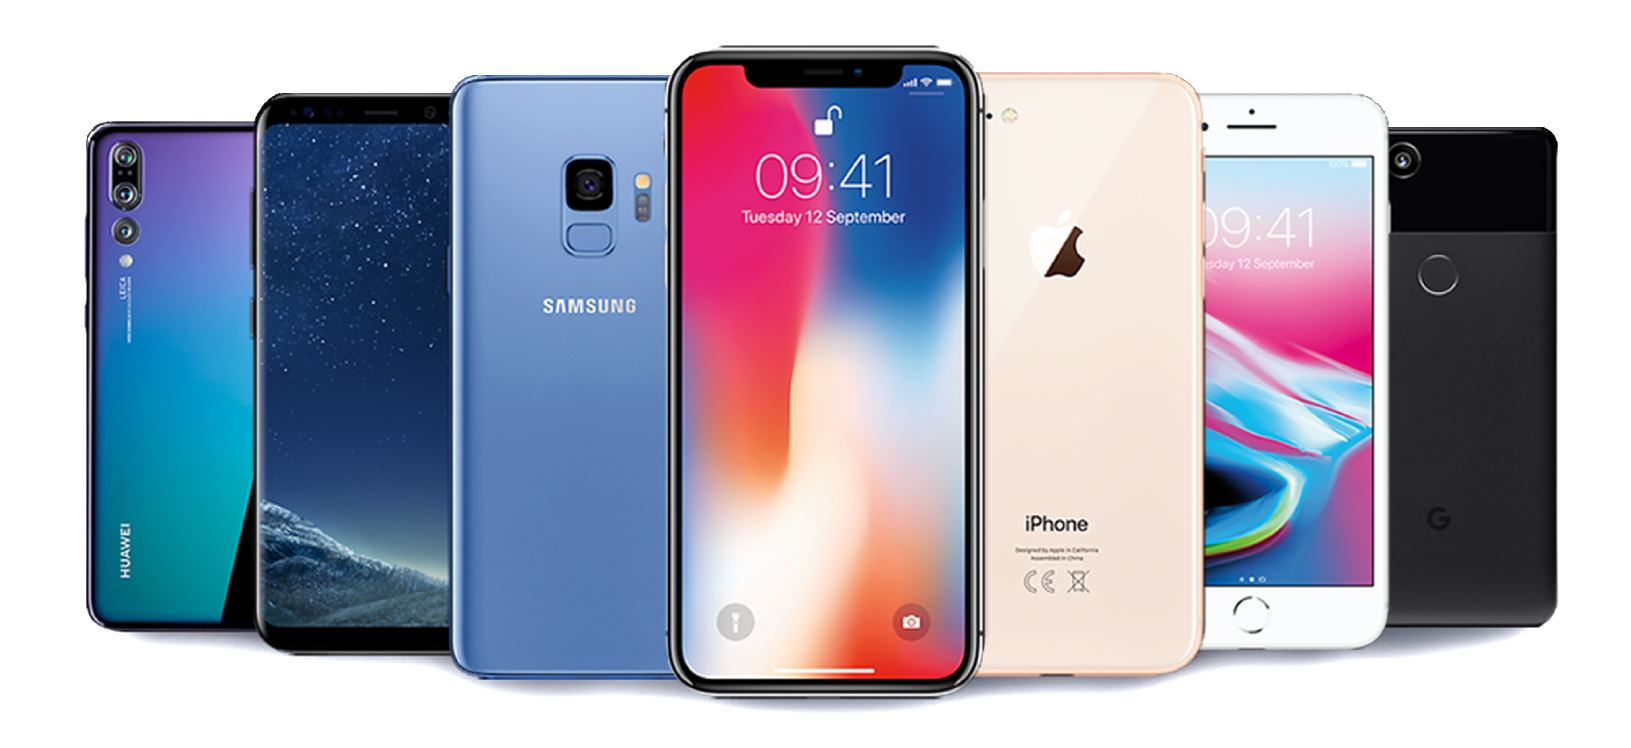

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff8c00>Problem:</font></h3>

We are a mobile phone manufacturer, and we have currently developed our mobile phones and are ready to introduce them to the market. However, the problem we have is that we don't know the approximate price range of our phones based on various features such as RAM, camera, display resolution, etc. In this regard, we have collected a dataset of phones from another company
    
          We hope to estimate the prices of our own mobile phones using machine learning models
    
                               👉( Decision Tree , Random Forest , SVM )

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff8c00>Table of Contents:</font></h3>

* **[Step 1 | Import Libraries](#import)**
* **[Step 2 | Read Dataset](#read)**
* **[Step 3 | Dataset Overview](#overview)**
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Continuous Variables](#cat_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#can_statistics)
* **[Step 4 | EDA](#eda)**
    - [Step 4.1 | Univariate Analysis](#univariate)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
    - [Step 4.3 | Multivariate Analysis](#multivariate)
* **[Step 5 | Data Preprocessing](#preprocessing)**
    - [Step 5.1 | Irrelevant Features Removal](#removal)
    - [Step 5.2 | Missing Value Treatment](#missing)
    - [Step 5.3 | Outlier Treatment](#outlier)
    - [Step 5.4 | Duplicate data Treatment](#duplicate)
* **[Step 6 | Decision Tree Model Building](#decision)**
    - [Step 6.1 | Hyperparameter Tuning](#grid_dts)
    - [Step 6.2 | Feature Selection](#Selection_dts)
    - [Step 6.3 | Cross Validation](#Cross_dts)
    - [Step 6.4 | Overfitting Treatment](#Overfitting_dts)
    - [Step 6.5 | Best DTS Model](#best_dts)
* **[Step 7 | Random Forest Model Building](#rf)**
    - [Step 7.1 | Hyperparameter Tuning](#grid_rf)
    - [Step 7.2 | Feature Selection](#Selection_rf)
    - [Step 7.3 | Cross Validation](#Cross_rf)
    - [Step 7.4 | Overfitting Treatment](#Overfitting_rf)
    - [Step 7.5 | Best RF Model](#best_rf)
* **[Step 8 | SVM Model Building](#svm)**
    - [Step 8.1 | Scale Data using Standard Scaler](#Scale_svm) 
    - [Step 8.2 | Hyperparameter Tuning](#grid_svm)    
    - [Step 8.3 | Cross Validation](#Cross_svm)
    - [Step 8.4 | Best SVM Model](#best_svm)
* **[Step 9 | Best Model🏆](#Best_model)**
* **[Step 10 | Estimating the prices of mobile phones](#Estimating)**

<a id="import"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:15px 50px; padding:10px">Step 1: Import Libraries</p>

⬆️[Tabel of Contents](#contents_tabel)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score ,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
import time

<a id="read"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:15px 50px; padding:10px">Step 2: Read Dataset</p>

⬆️[Tabel of Contents](#contents_tabel)

In [2]:
data_train=pd.read_csv("D:/shinetech/train.csv")
data_test=pd.read_csv("D:/shinetech/test.csv")

In [3]:
Df_train = pd.DataFrame(data_train)
Df_train.head(5)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
Df_test = pd.DataFrame(data_test)
Df_test.head(5)

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

<div style="background-color:#bdf0e6; padding:20px; font-size:15px">

|       | **Columns** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | battery_power | Total energy a battery can store in one time measured in (mAh) |                
| **2** | blue | Has bluetooth or not |                        
| **3** | clock_speed | Speed at which microprocessor executes instructions |
| **4** | dual_sim | Has dual sim support or not |
| **5** | fc | Front camera (Megapixels) |                     
| **6** | four_g | Has 4G or not |
| **7** | int_memory | Internal memory in (Gigabytes) |              
| **8** | m_dep | Mobile depth in (Cm)  |                      
| **9** | mobile_wt |  Weight of mobile phone |
| **10** | pc | Primary camera (Megapixels) |
| **11** | px_height | Pixel resolution height |                      
| **12** | px_width | Pixel resolution width |
| **13** | ram | Random access memory in (Megabytes)  |              
| **14** | sc_h | Screen height of mobile in (Cm)  |                      
| **15** | sc_w | Screen width of mobile in (Cm) |
| **16** | talk_time | Longest time that a single battery charge will last when you are constantly talking on the phone |
| **17** | three_g | Has 3G or not |                      
| **18** | touch_screen | Has touch screen or not | 
| **19** | wifi | Has wifi or not |              
| **20** | n_cores | Number of cores of processor |                       
| **21** | **price_range** | This is the Target variable with value of **0: (Low Cost**), **1: (Medium Cost**), **2: (High Cost**), and **3: (Very High Cost**) |

<a id="overview"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:15px 50px; padding:10px">Step 3: Dataset Overview</p>

⬆️[Tabel of Contents](#contents_tabel)

<a id="basic"></a>
# <b><span style='color:darkorange'>Step 3.1 |</span><span style='color:black'> Dataset Basic Information</span></b>

In [5]:
Df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* **Data:** In this dataset, we have **21 columns** and **2000 data points**, all of which are numeric types in the form of **integers** and **floats**

* **Msissing value:** In this dataset, we do not have any missing data

<a id="cat_statistics"></a>
# <b><span style='color:darkorange'>Step 3.2 |</span><span style='color:black'> Summary Statistics for Continuous Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* **Categorical variables(8)**: `n_cores` , `price_range`, `blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, `wifi`
---
* **Continuous variables(13)**: `battery_power`, `clock_speed`, `fc`, `int_memory`, `m_dep`, `mobile_wt`, `pc`, `px_height`, `px_width`, `ram`, `talk_time`, `sc_h`, `sc_w`

In [6]:
df_categorical = Df_train [['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']]
df_continuous= Df_train.drop (df_categorical,axis=1)

In [7]:
df_continuous.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   

                   75%     max  
battery_power  1615.25  1998.0  
clock_speed       2.20     3.0  
fc                7.00    19.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* **battery_power:** The battery power range of the phones is from **280** to **2000**
* **clock_speed:** The processor speed range is from **0.5** to **3**
* **fc:** The range of front camera pixel count is from **1** to **19**, and **0** indicates that the phone does not have a front camera
* **int_memory:** The memory range of the phone is from **2** to **64** gigabytes
* **m_dep:** The depth range of the phone is from **0.1** to **1**
* **mobile_wt:** The weight range of the mobile phone is from **80** to **200**
* **pc:** The range of megapixels for the rear camera is from **0** to **20**, and a data point of **0** indicates that the phone does not have a rear camera
* **px_height:** The range of pixel resolution height is from **0** to **1960**, and a data point of **0 is not logical**
* **px_width:** The range of pixel resolution width varies from **500** to **1998**
* **ram:** The RAM range in megabytes is between **256** and **3989**
* **sc_h:** The range of phone length variations is from **5** to **19**
* **sc_w:** The range of phone width variations is from **0** to **18** centimeters, and a data point equal to **0 is not considered normal**.
* **talk_time:** The range of maximum talk time with a single charge is between **2** and **20** hours.
    


<a id="can_statistics"></a>
# <b><span style='color:darkorange'>Step 3.3 |</span><span style='color:black'> Summary Statistics for Categorical Variables</span></b>

In [8]:
df_categorical.describe()

price_range      n_cores       blue     dual_sim       four_g  \
count  2000.000000  2000.000000  2000.0000  2000.000000  2000.000000   
mean      1.500000     4.520500     0.4950     0.509500     0.521500   
std       1.118314     2.287837     0.5001     0.500035     0.499662   
min       0.000000     1.000000     0.0000     0.000000     0.000000   
25%       0.750000     3.000000     0.0000     0.000000     0.000000   
50%       1.500000     4.000000     0.0000     1.000000     1.000000   
75%       2.250000     7.000000     1.0000     1.000000     1.000000   
max       3.000000     8.000000     1.0000     1.000000     1.000000   

           three_g  touch_screen         wifi  
count  2000.000000   2000.000000  2000.000000  
mean      0.761500      0.503000     0.507000  
std       0.426273      0.500116     0.500076  
min       0.000000      0.000000     0.000000  
25%       1.000000      0.000000     0.000000  
50%       1.000000      1.000000     1.000000  
75%       1.000000      1.000000     1.000000  
max       1.000000      1.000000     1.000000

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* **blue:** Some phones do not have Bluetooth **(0)**, while others have Bluetooth **(1)**
* **dual_sim:** Some phones are dual SIM **(1)**, while others are not **(0)**
* **n_cores:** The number of processor cores is between **2** and **8**
* **four_g:** Some phones have the feature of **4g (1)**, while others do not have this feature **(0)**
* **three_g:** Some phones have the feature of **3g (1)**, while others do not have this feature **(0)**
* **touch_screen:** Some phones have a touch screen **(1)**, while others do not have this capability **(0)**
* **wifi:** Some phones have Wi-Fi capability **(1)**, while others do not have Wi-Fi **(0)**
---
* **price_range:** The price range of phones is categorized into four groups: cheap **(0)**, moderate **(1)**, expensive **(2)**, and very expensive **(3)**. 
-
**This variable is our target in this project**

<a id="eda"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:15px 50px; padding:10px">Step 4: Exploratory Data Analysis (EDA)</p>

⬆️[Tabel of Contents](#contents_tabel)

<a id="univariate"></a>
# <b><span style='color:darkorange'>Step 4.1 |</span><span style='color:black'> Univariate Analysiss</span></b>

- We perform univariate analysis separately for each categorical and continuous variable:

<a id="univariate"></a>
# <b><span style='color:darkorange'>Step 4.1.1 |</span><span style='color:black'> Categorical Variables Univariate Analysis</span></b>

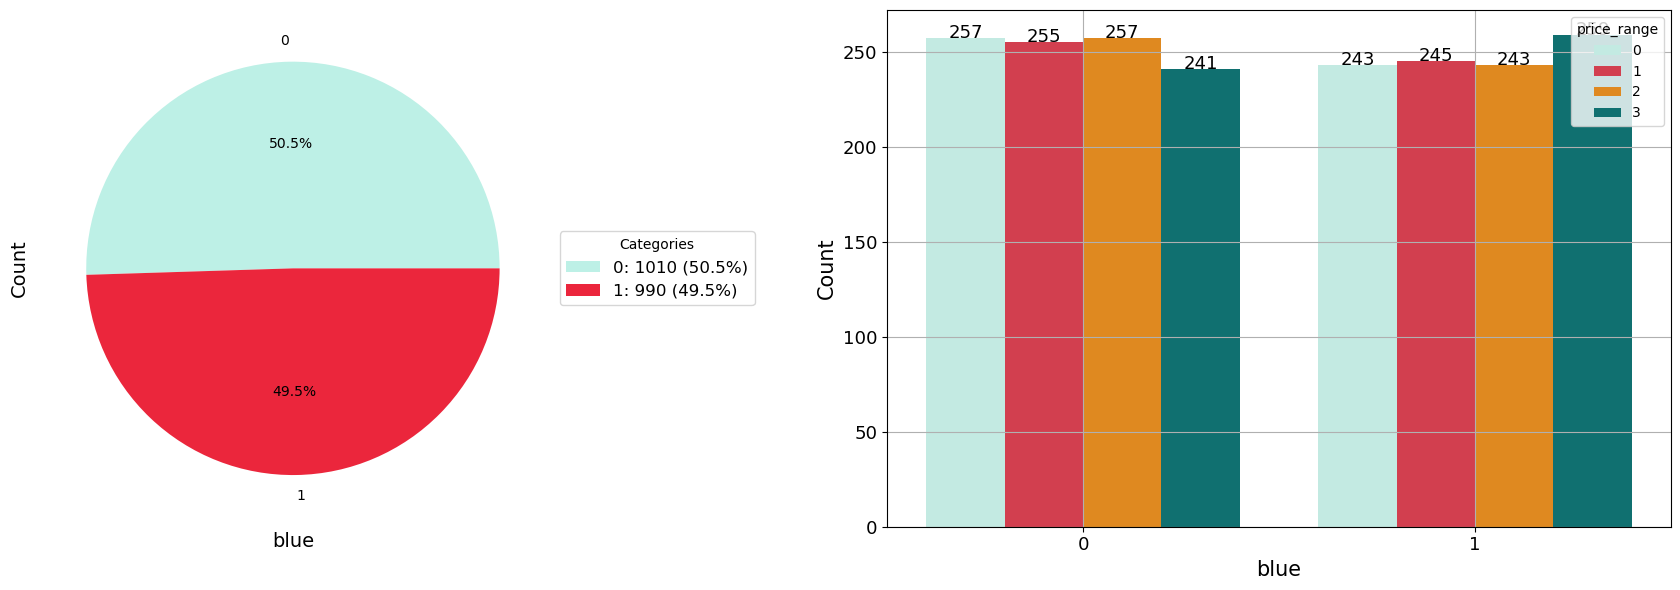

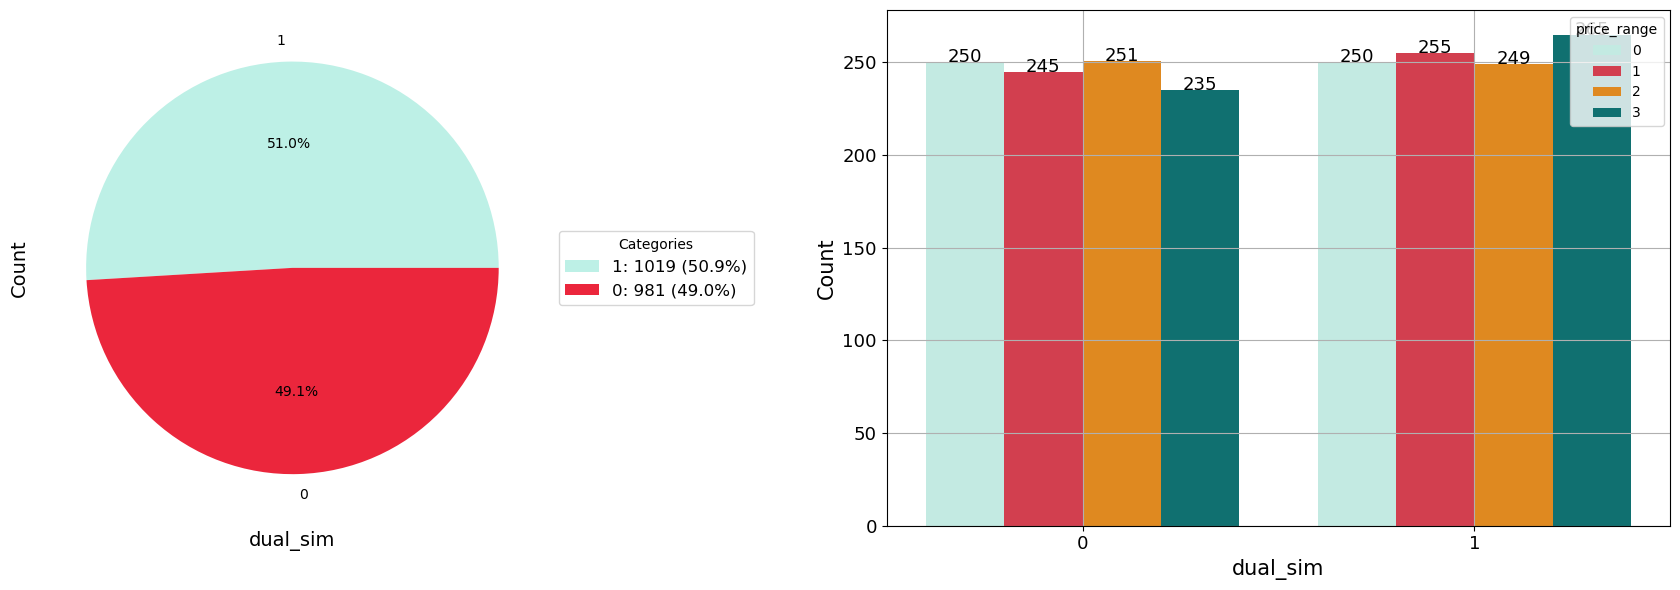

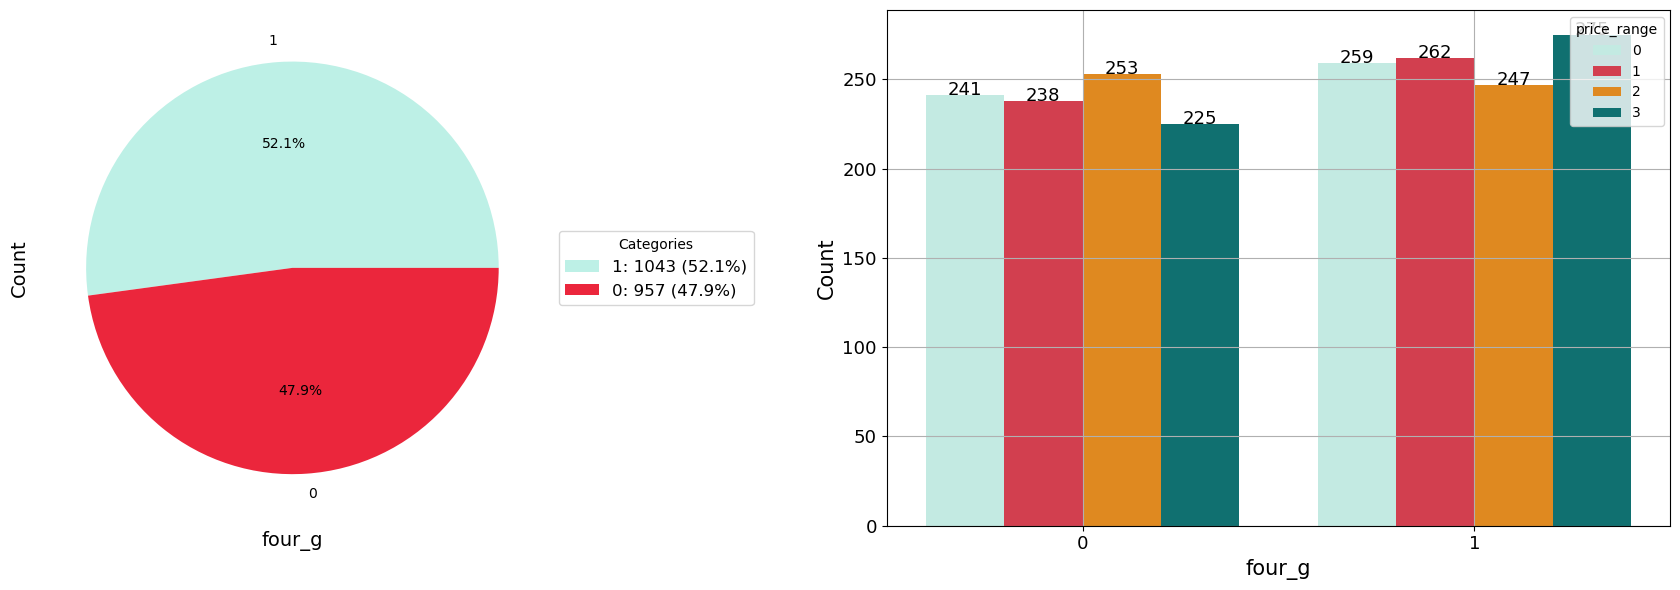

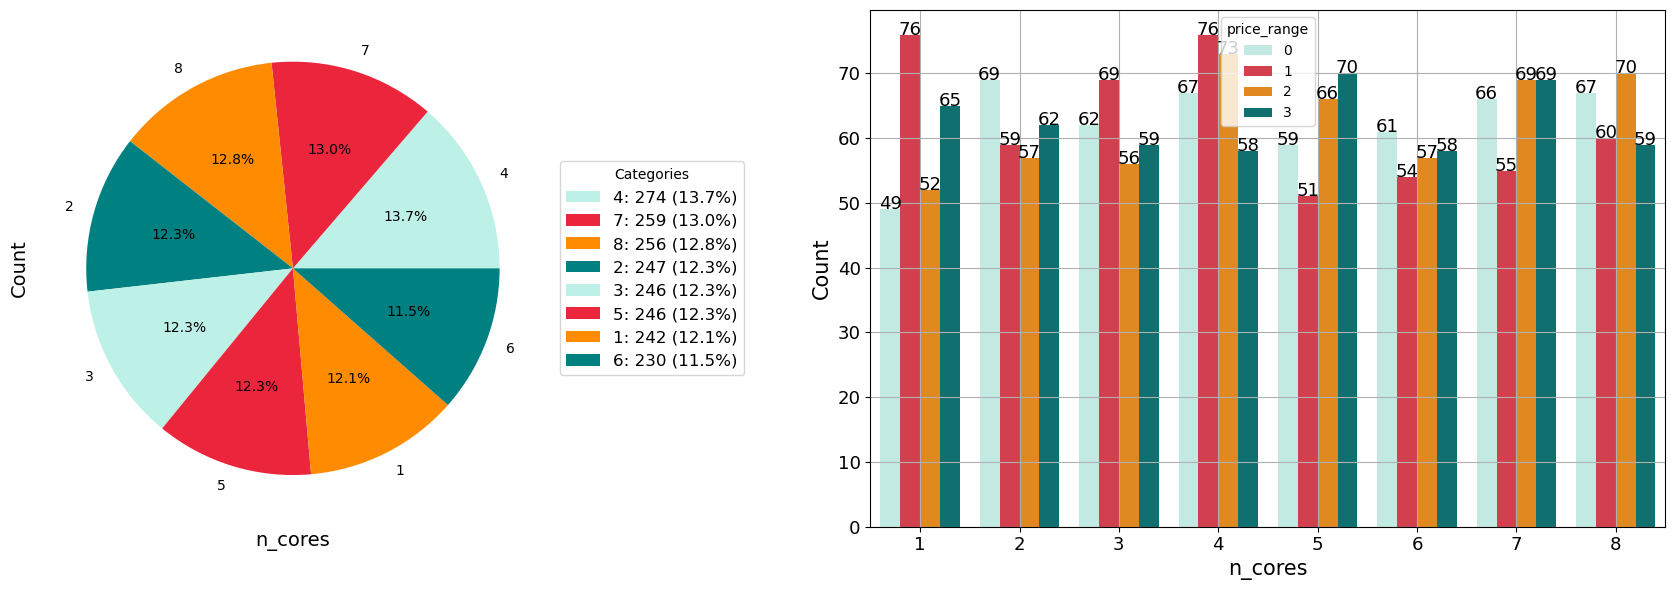

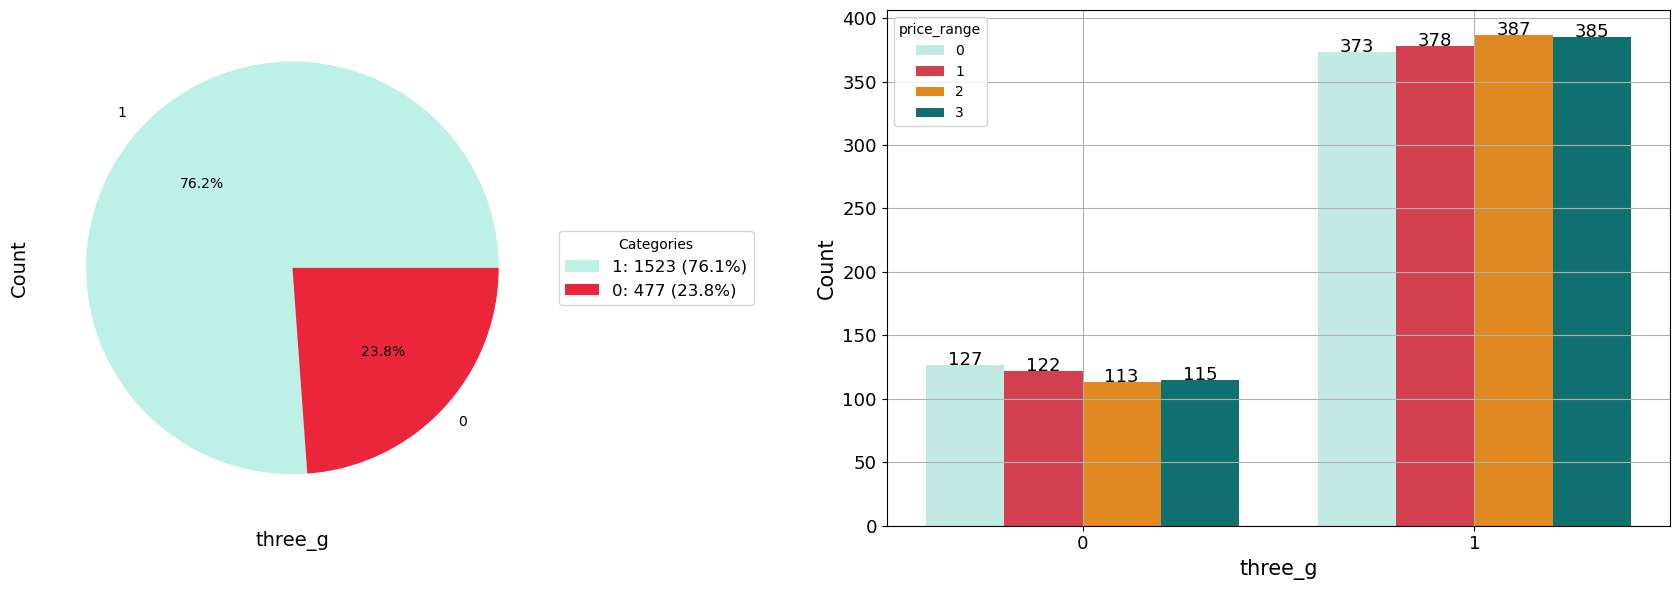

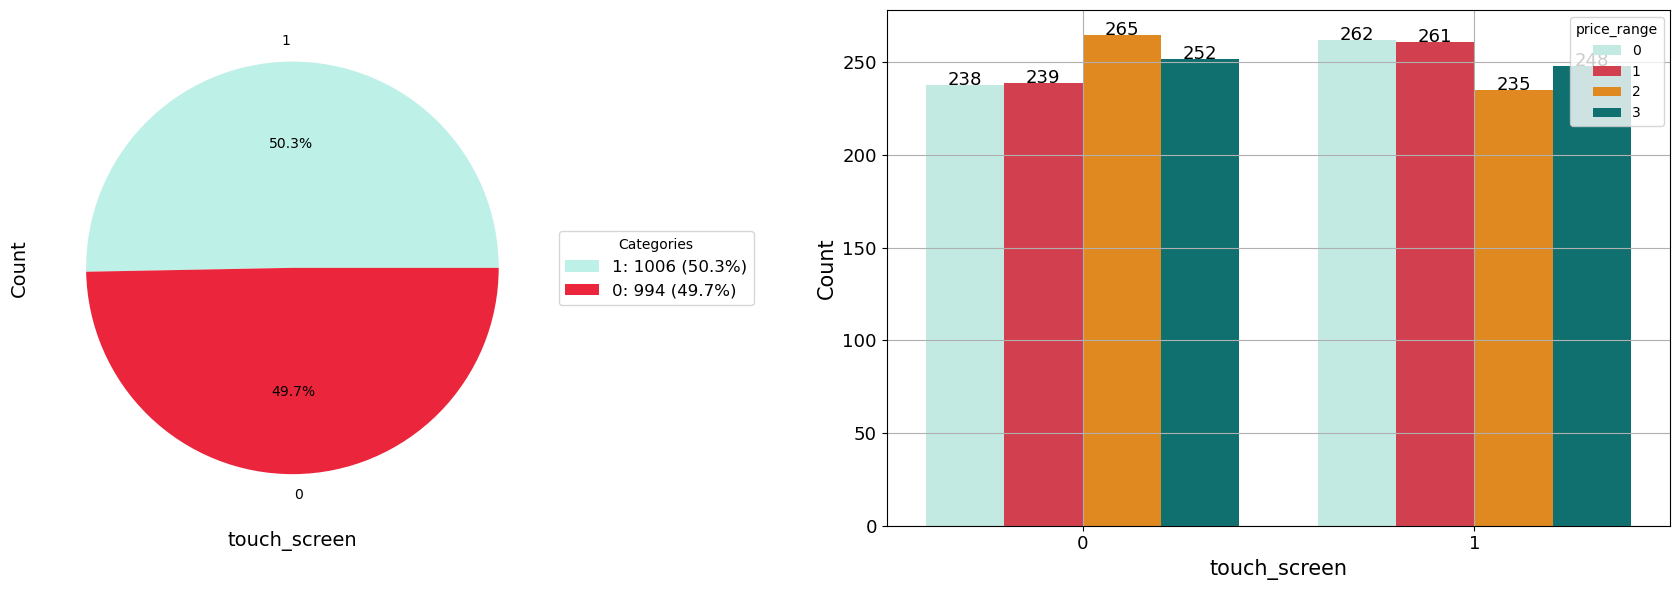

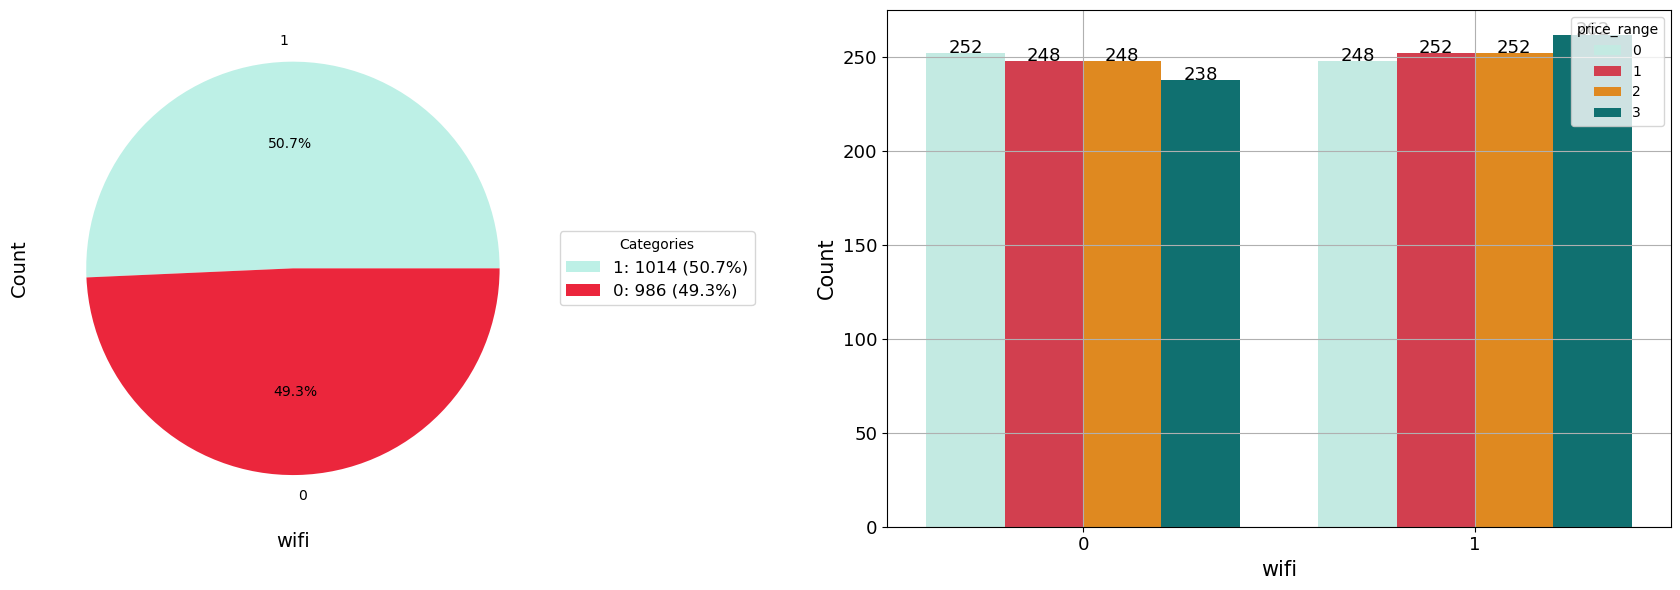

In [9]:
features = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

for feature in features:
    counts = df_categorical[feature].value_counts()
    percentages = counts / counts.sum() * 100
    colors = ['#bdf0e6', '#eb263c', '#ff8c00', '#008080']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    
    # Pie chart
    wedges, _, _ = ax1.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
    ax1.set_xlabel(feature, fontsize=14)
    ax1.set_ylabel('Count', fontsize=14)
    
    legend_labels = []
    for i, (count, percent) in enumerate(zip(counts, percentages)):
        label = f'{counts.index[i]}: {count} ({percent:.1f}%)'
        legend_labels.append(label)
    
    ax1.legend(wedges, legend_labels, title='Categories', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.setp(ax1.get_xticklabels(), fontsize=12)
    plt.setp(ax1.get_yticklabels(), fontsize=12)
    
    # Countplot
    ax2 = sns.countplot(x=feature, data=Df_train, ax=ax2,hue='price_range', palette=colors)
    ax2.set_xlabel(feature, fontsize=15)
    ax2.set_ylabel('Count', fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid()
    for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()), ha='center', fontsize=13)
    
    plt.tight_layout()
    plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* **Blue:** 
   - The **number** of phones **without Bluetooth** is **higher** compared to the number of **phones with Bluetooth**.
   - Most **cheap (0)** phones do not have Bluetooth.
   - Most **moderate (1)** phones do not have Bluetooth.
   - Most **expensive (2)** phones do not have Bluetooth.
   - Most **very expensive (3)** phones have Bluetooth
 
* **dual_sim:**
   - The **number of cheap phones** that are **dual SIM** and **single SIM** are equal
   - Most **moderate (1)** phones are dual SIM.
   - Most **expensive (2)** phones are single SIM.
   - Most **very expensive (3)** phones are dual SIM.
   - In general, the number of **dual SIM phones** is **higher** than the number of **single SIM phones**.
* **four_g:**
   - Most cheap **(0)** phones are **4g**.
   - Most moderate **(1)** phones are **4g**.
   - **Most expensive (2)** phones **are not 4g**.
   - Most very expensive **(3)** phones are **4g**.
   - In general, the number of **4g** phones is higher than the number of phones that are not **4g**.
* **n_cores:**
   - **Single core** phones in terms of quantity: cheap (0) < Expensive (2) < Very expensive (3) < moderate (1).
   - **Dual core** phones in terms of quantity: Expensive (2) < moderate (1) < Very expensive (3) < cheap (0).
   - **Triple core** phones in terms of quantity: Expensive (2) < Very expensive (3) < cheap (0) < moderate (1).
   - **Quad core** phones in terms of quantity: Very expensive (3) < cheap (0) < Expensive (2) < moderate (1).
   - **Five core** phones in terms of quantity: moderate (1) < cheap (0) < Expensive (2) < Very expensive (3).
   - **Six core** phones in terms of quantity: moderate (1) < Expensive (2) < Very expensive (3) < cheap (0).
   - **Seven core** phones in terms of quantity: moderate (1) < cheap (0) < Expensive (2) = Very expensive (3).
   - **Eight core** phones in terms of quantity: Very expensive (3) < moderate (1) < cheap (0) < Expensive (2).
   - The **most expensive phones** had either 5 or 7 cores.
   - The **cheapest phones** had either 2 or 8 cores.
   - The **highest number** of phones belonged to the category of phones with a **moderate price** and either **1 or 4** cores.
   - The **lowest number** of phones belonged to the category of phones with a cheap price and a single core, as well as phones      with a moderate price and **5 or 6** cores.
* **three_g:**
   - In **phones without 3G** capability, the number of phones decreases with an increase in price.
   - In phones with 3G capability, the number of phones increases with an increase in price.
   - The number of phones with 3G is approximately three times the number of phones without 3G.
* **touch_screen:**
   - The number of phones with touchscreen is approximately equal to the number of phones without touchscreen.
   - With an increase in price, the number of phones without touchscreen increases.
   - With an increase in price, the number of phones with touchscreen decreases.
   - Most phones without touchscreen have expensive and very expensive prices.
   - Most phones with touchscreen have affordable and moderate prices.
* **wifi:** 
   - With an increase in price, the number of phones without Wi-Fi decreases.

   - With an increase in price, the number of phones with Wi-Fi increases.

   - The number of phones with Wi-Fi is approximately equal to the number of phones without Wi-Fi.

   - Most affordable phones do not have Wi-Fi, and most very expensive phones have Wi-Fi.

   - Most moderate and expensive phones have Wi-Fi.                                                                                                         

<a id="can_statistics"></a>
# <b><span style='color:darkorange'>Step 4.1.2 |</span><span style='color:black'> Continuous Variables Univariate Analysis</span></b>

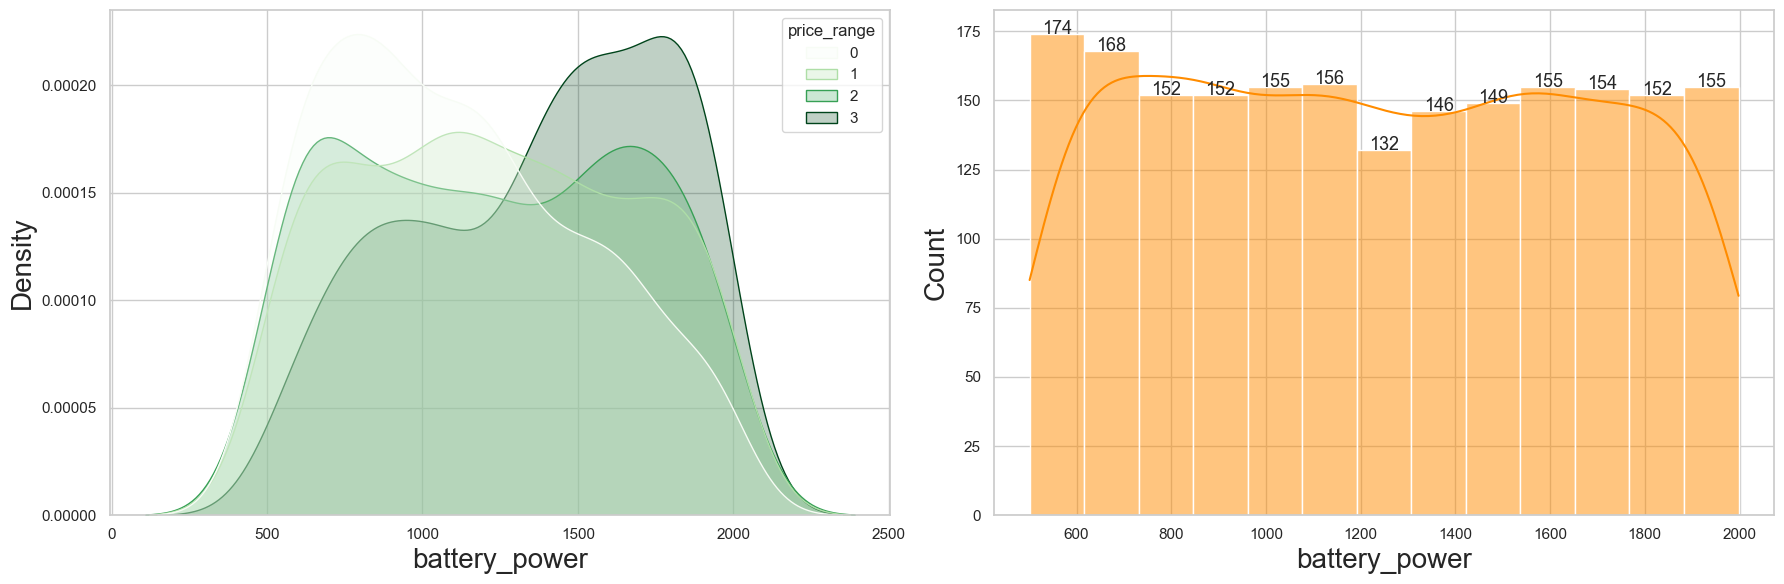

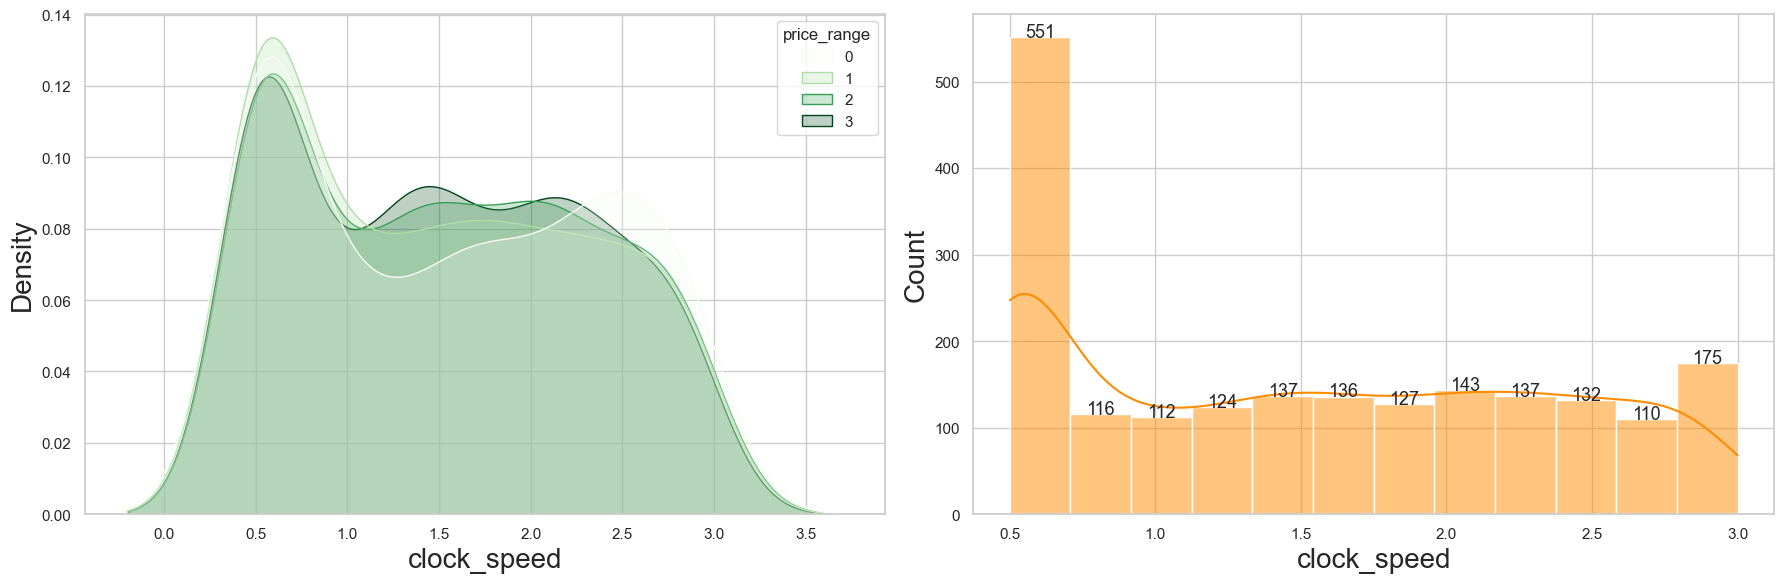

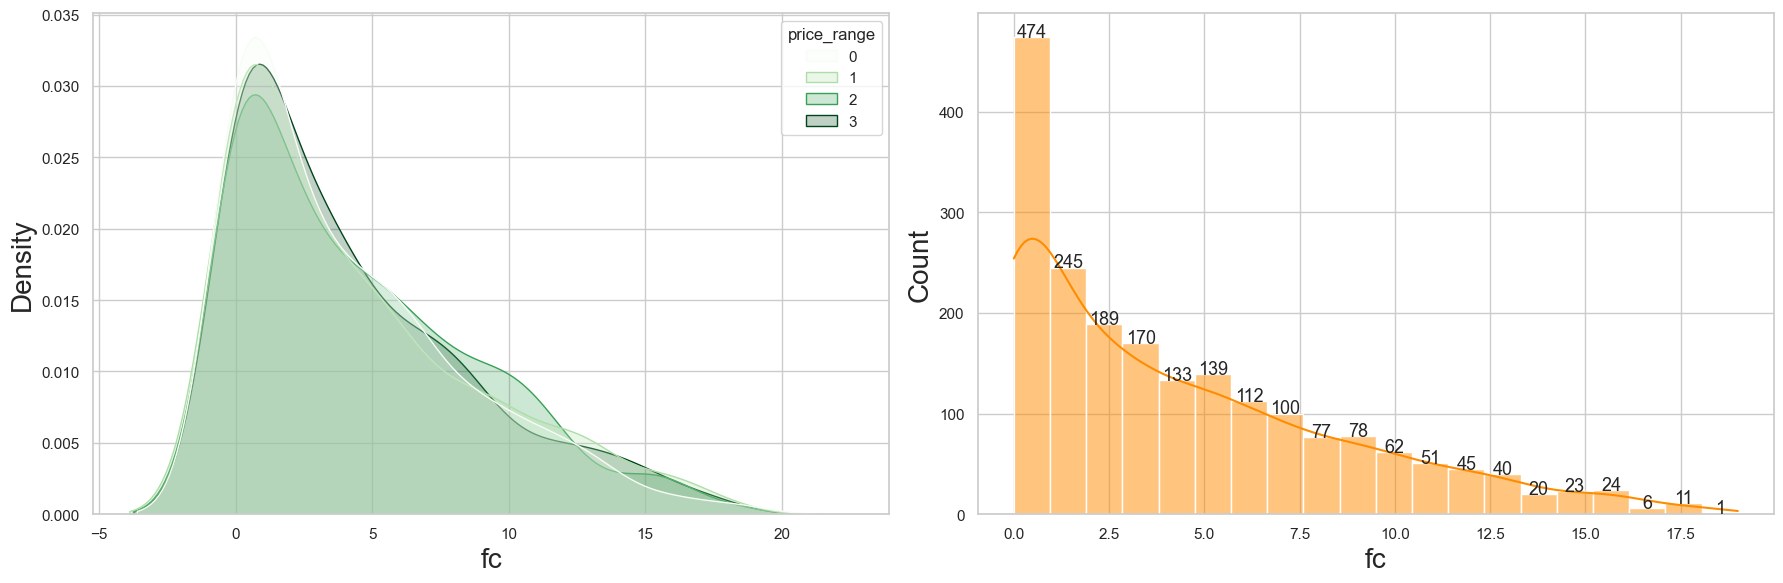

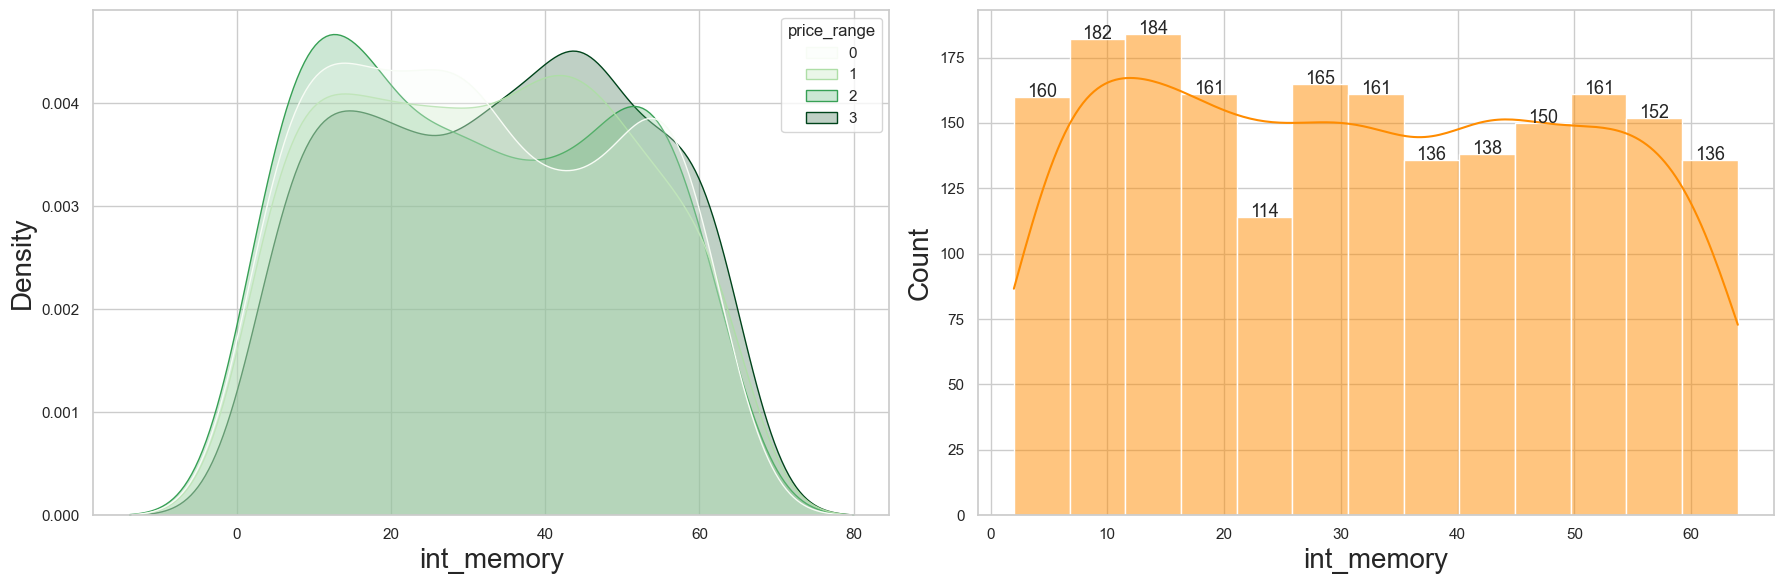

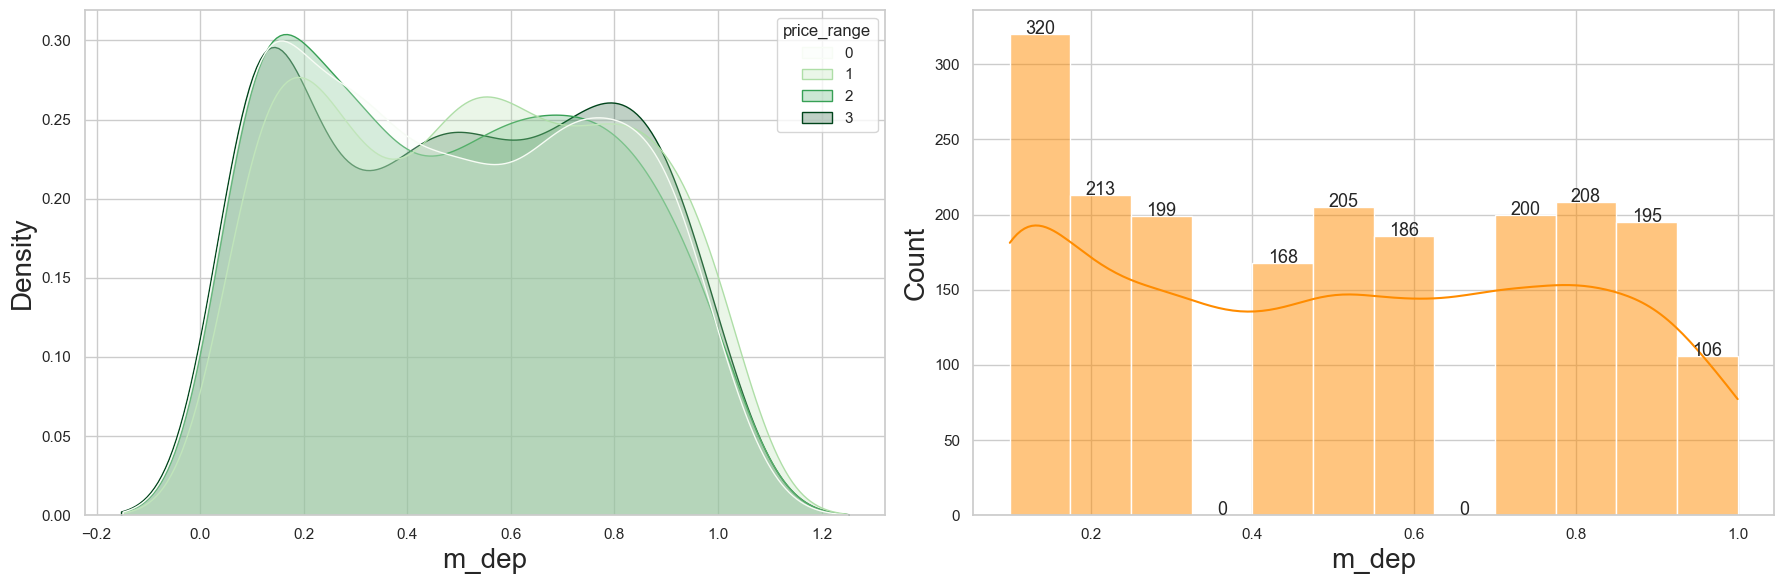

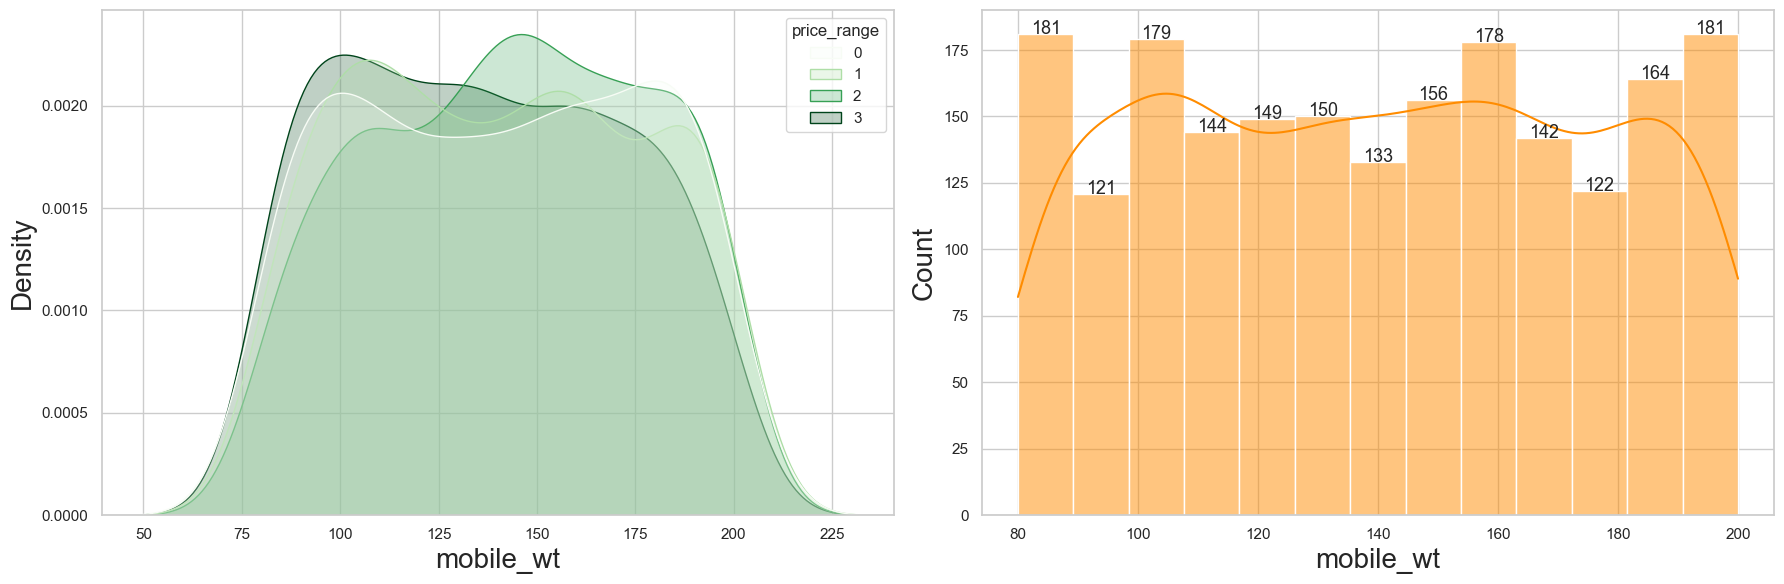

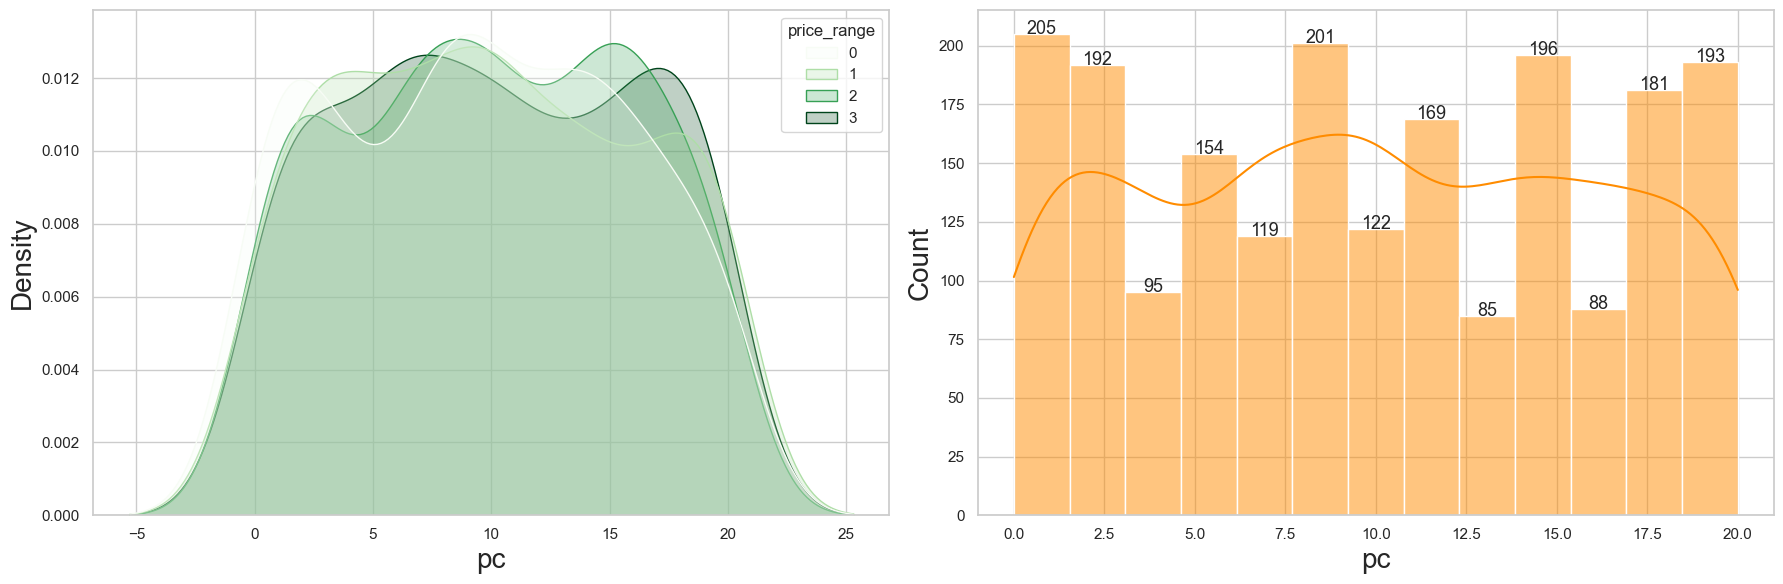

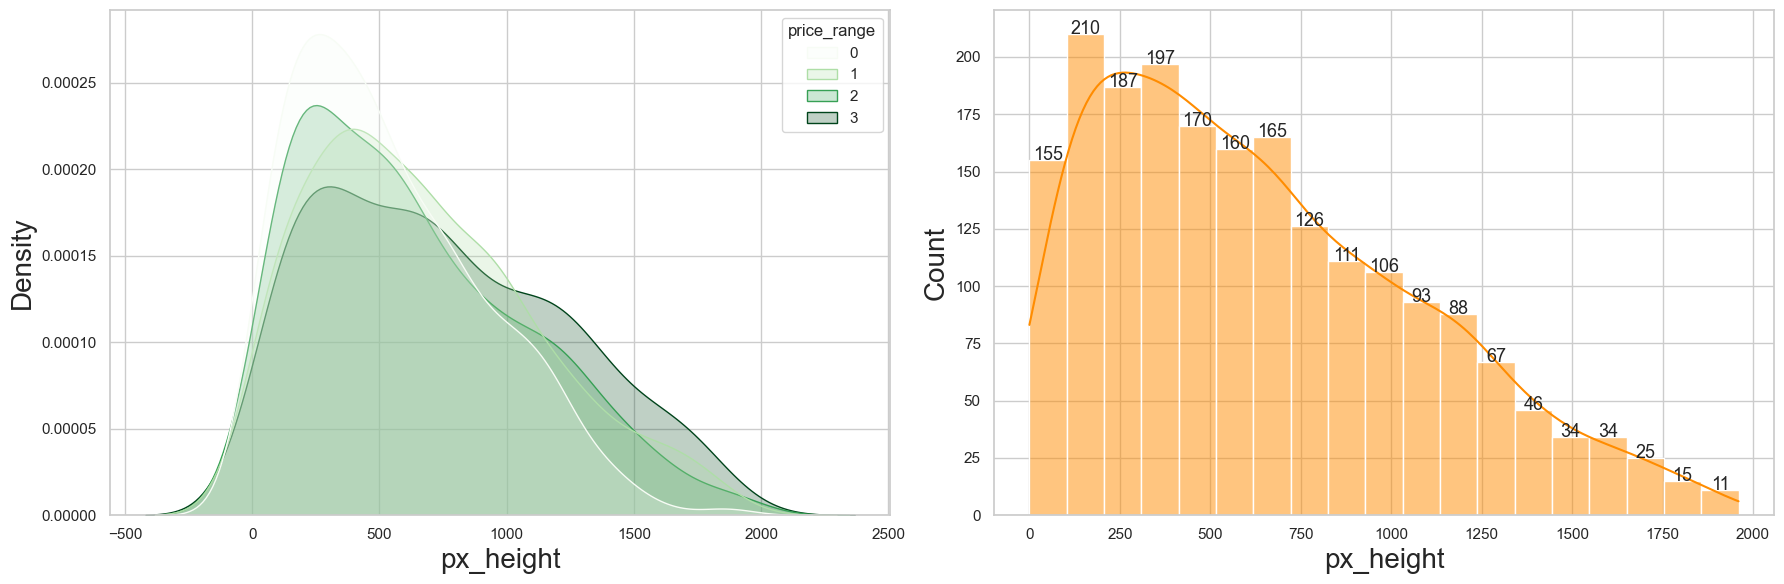

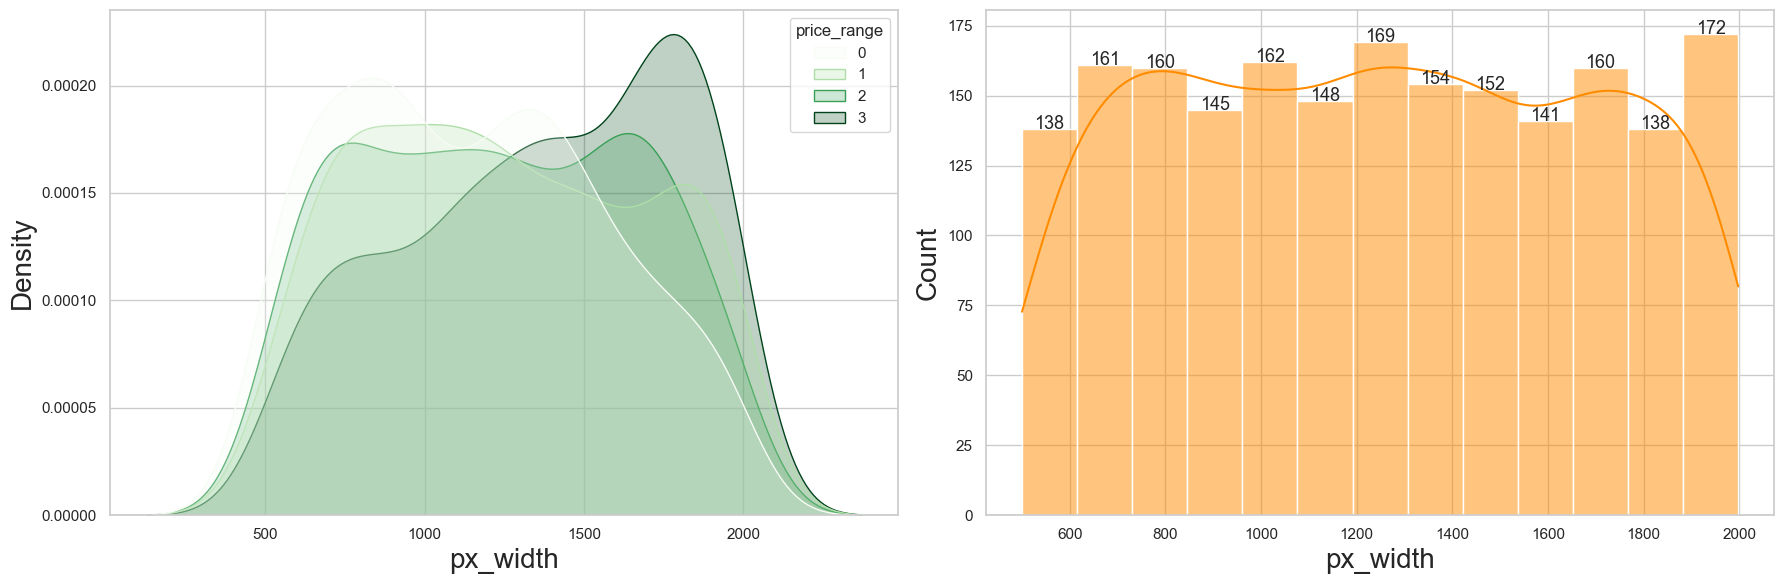

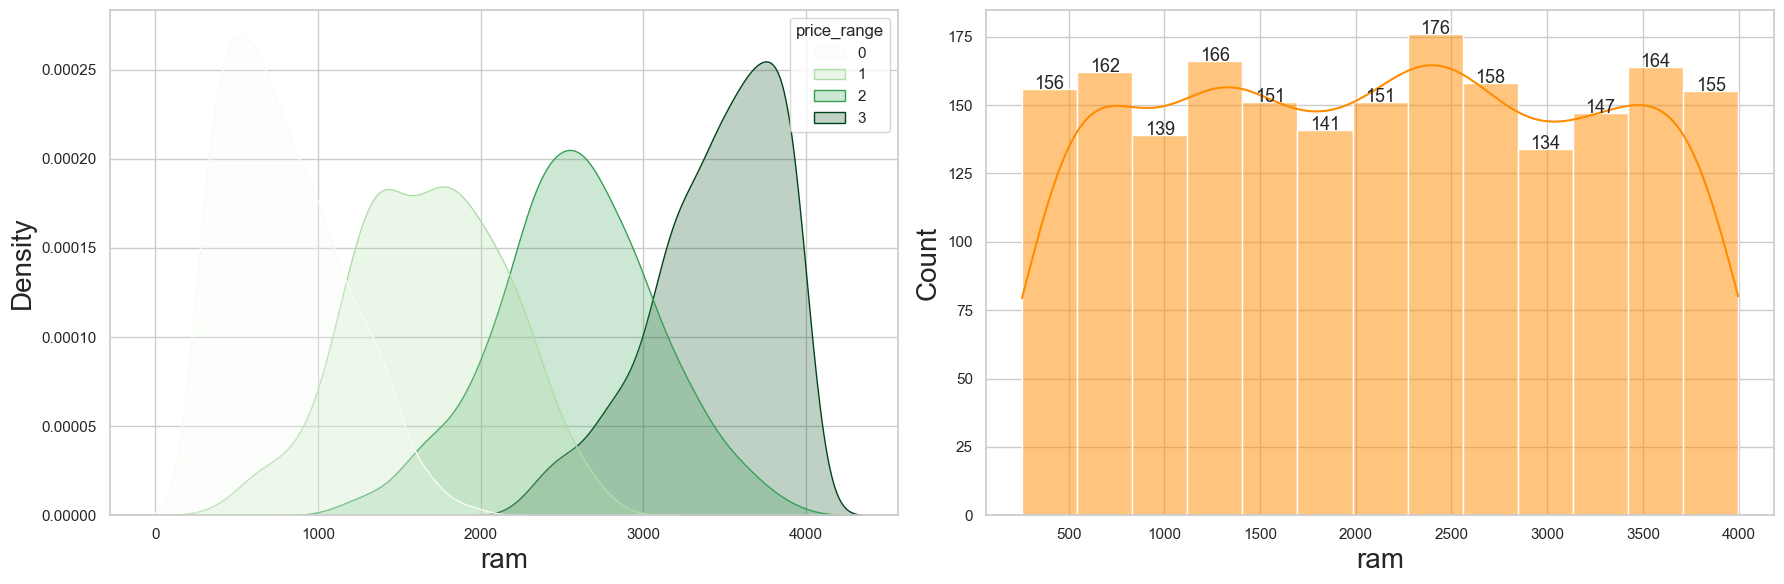

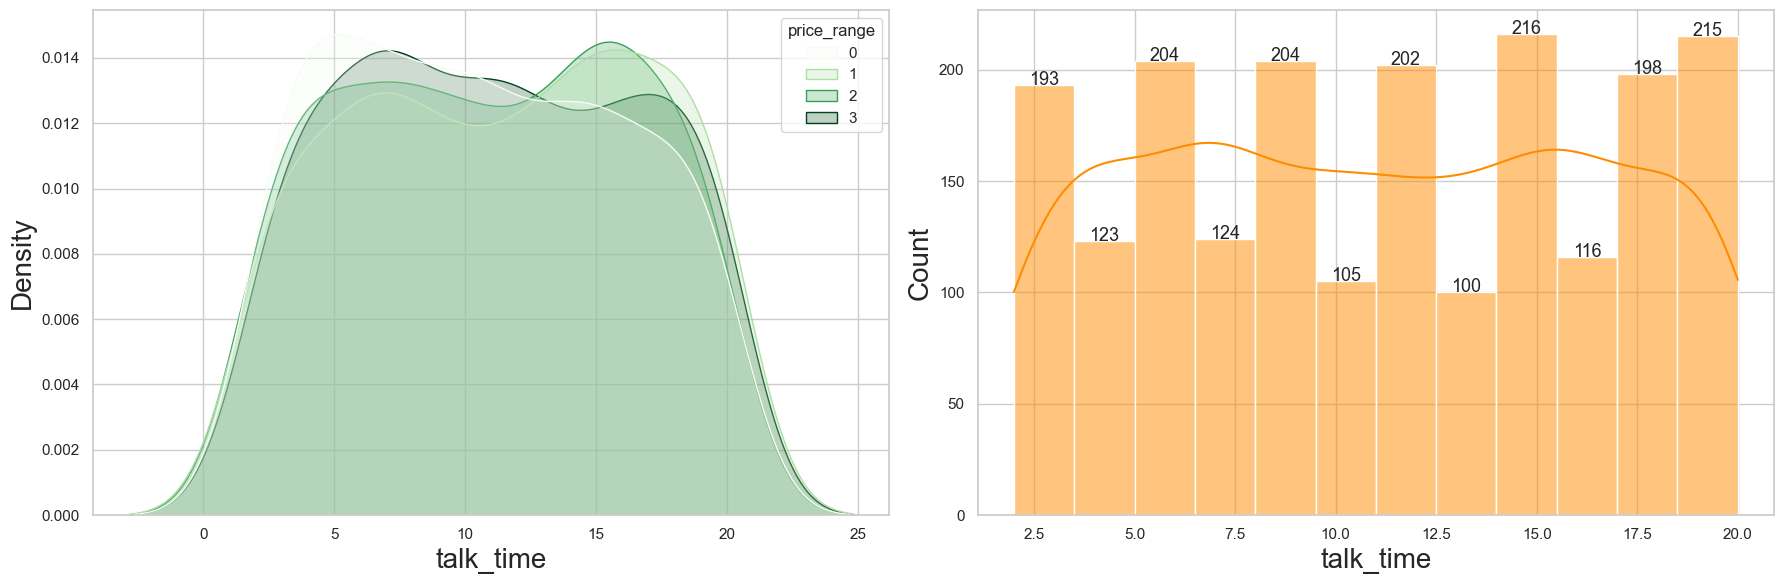

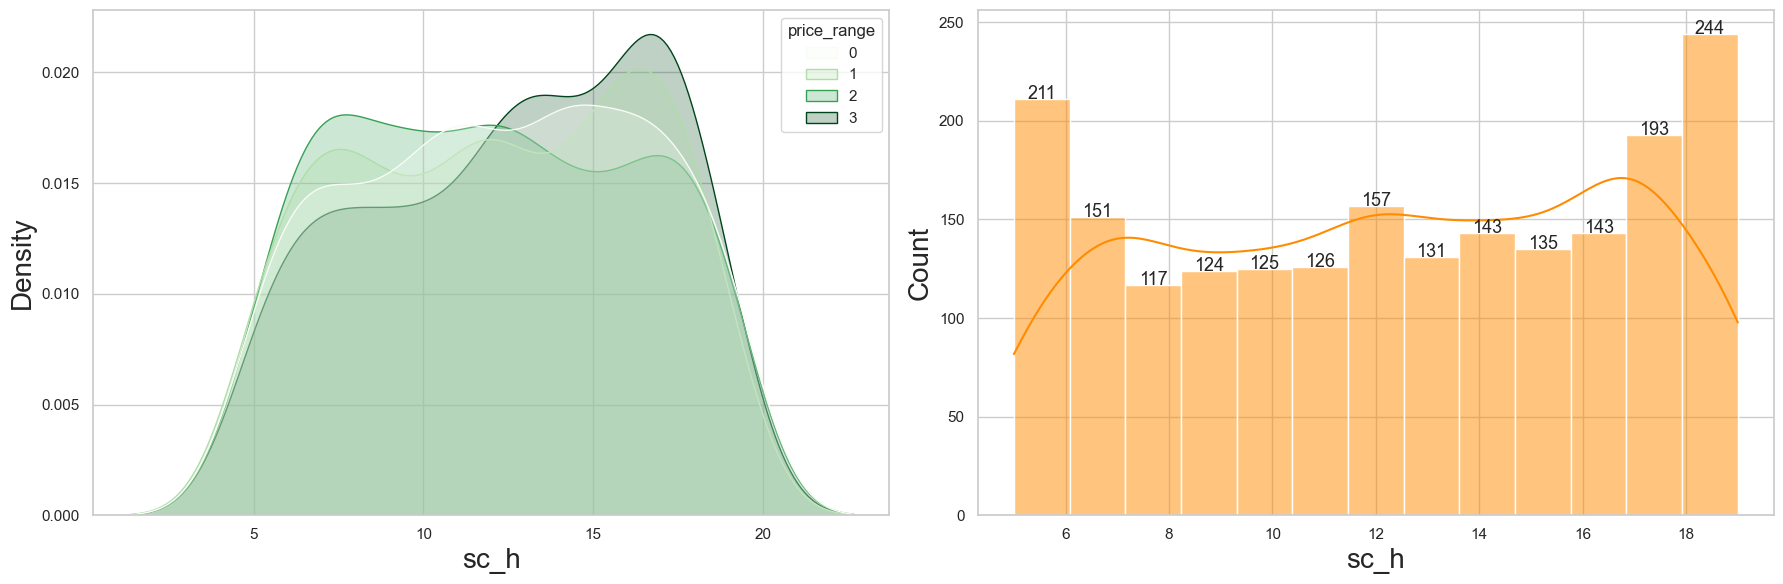

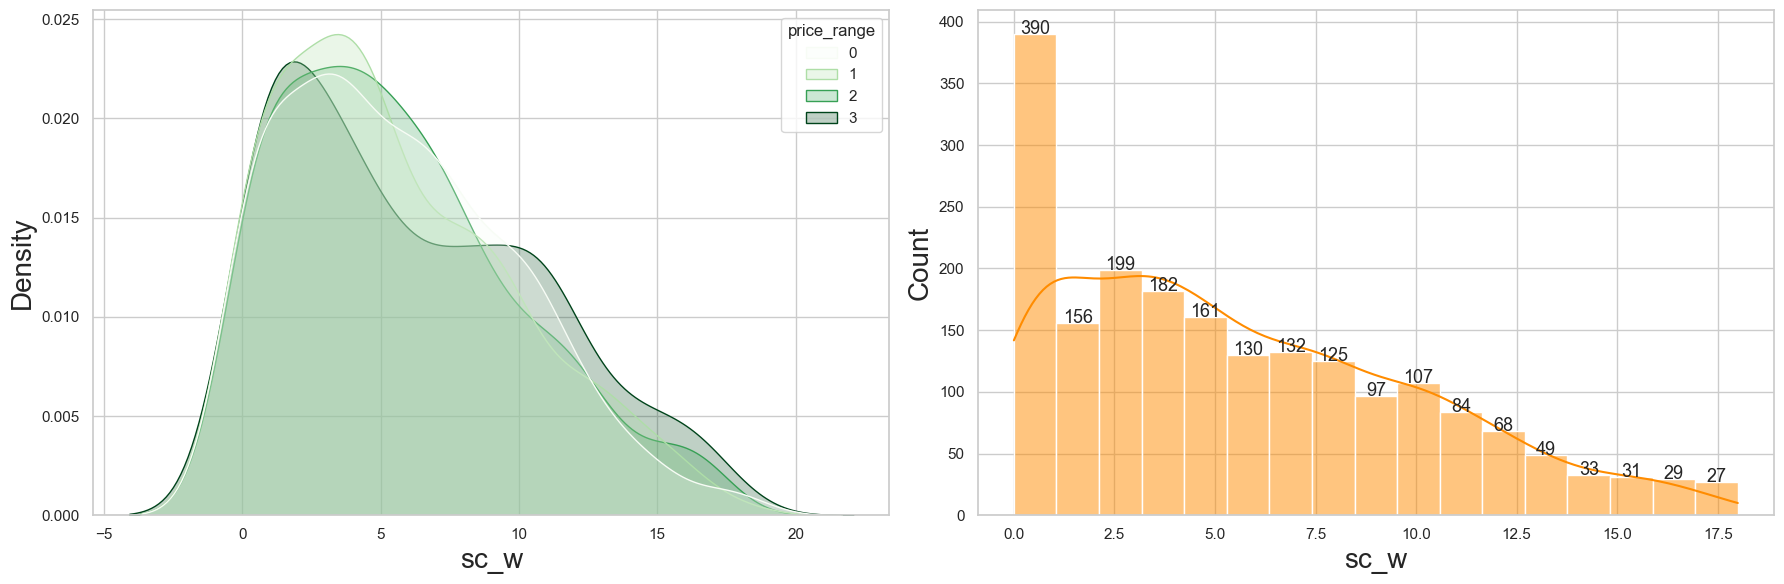

In [10]:
sns.set(style='whitegrid')

cont_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc',
             'px_height', 'px_width', 'ram', 'talk_time', 'sc_h', 'sc_w']

for feature in cont_cols:
    sns.set(style='whitegrid')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    
    # KDE plot
    sns.kdeplot(data=Df_train, x=feature, hue='price_range', shade=True, palette='Greens', ax=ax1)
    ax1.set_xlabel(feature, fontsize=20)
    ax1.set_ylabel('Density', fontsize=20)
    
    # Histogram plot
    ax2 = sns.histplot(data=Df_train, x=feature, color='#ff8c00', ax=ax2,kde=True)
    ax2.set_xlabel(feature, fontsize=20)
    ax2.set_ylabel('Count', fontsize=20)
    
    value_counts = Df_train[feature].value_counts()
    for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', fontsize=13)
        ax2.annotate('', (0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=13, color='red')
    
    plt.tight_layout()
    plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* **Distribution type: Normal distribution is observed in the `int_memory`, `mobile_wt`, `pc` and `talk time` columns for all price ranges.**
-    
* **battery_power:**
   - **As battery power increases, the price of the phone also increases**
   - From the range of **280 to 2000**, as battery power **increases**, the number of phones decreases (from 56 to 48).
   - The maximum number of phones is in the battery power range of **500 to 700**, and the minimum number of phones is in the  
battery power range of **1200 to 1400**.
* **clock_speed:**
   - The maximum number of phones is observed in the processor speed range of **0.5 to 0.7 (551 phones)**.
   - From a processor speed of **0.7 to 3**, as the processor speed increases, the number of phones also increases.
   - Phones with **higher prices** are predominantly seen in the **range of 1.2 to 2.4**.
* **fc:**
   - The **range of pixel count is from 1 to 19**, with **0** indicating phones **without a front camera**.
   - As the pixel count of the camera **increases**, the number of phones decreases.
   - The majority of phones have either no front camera or, if they do, they are mostly supplied with a pixel count of **9** or lower.
* **int_memory:**
   - The **minimum number of phones** in the memory range between **22 and 27** GB is the **maximum number of phones** in the range of **12 to 17** GB.
   - High-priced phones are mostly in the range of **32 to 64** GB, while low-priced phones are more commonly found in the range of **2 to 32 GB**.
   - The cheapest phones are in the memory range between **27 and 32 GB**, while the most expensive phones are in the range of 40 to 45 GB.
   - As the internal memory increases, the price of the phone also increases, and the number of phones available decreases.
Most of the phones being released have internal **memory below 32 GB**.
* **m_dep:**
   - Most phones are at a depth of 0.1, and there are fewer phones at depths ranging from **0.92 to 1**.
   - We do not have any phones at depths ranging from **0.32 to 0.40** and **0.62 to 0.72**.
   - In general, as the depth of the phone increases, the number of phones decreases. Therefore, most phones are supplied with shallow depths
   - **Here, phones with a depth below 0.5 are noisy**
* **mobile_wt:**
   - The maximum number of phones is in the weight range of **80 to 88 grams**, while the minimum number is in the range of 88 to **98 grams**.

   - Expensive phones mostly fall within the weight range of **80 to 145 grams**, while affordable phones are predominantly in the range of **155 to 200 grams**.

   - In general, as the weight of the phone increases, its price decreases
* **pc:**
   - **Phones without cameras usually have affordable or average prices**.
   - Most cameras used in phones have resolutions of **9, 10, 7, and 20** megapixels.
   - The minimum resolution cameras used in phones are **5, 11, and 18** megapixels.
   - In the range of **0 to 5** megapixels, the number of phones decreases as the number of pixels increases.
   - In the range of **5 to 10** megapixels, the number of phones increases as the number of pixels increases.
   - In the range of **11 to 20** megapixels, the number of phones increases as the number of pixels increases.
* **px_height:**
   - The range of pixel resolutions ranges from **0 to 1960**, and the number of phones ranges from **0 to 60**.
   - Most affordable phones have pixel resolutions between **0 and 1000**, which make up the majority of phones.
   - Most expensive phones have pixel resolutions between **1000 and 1960**, which make up a small portion of phones.
   - Most phones released have pixel resolutions between **100 and 500**, with a **higher prevalence** of affordable and average-priced phones.
   - **As the pixel resolution increases, the number of phones decreases**.
* **px_width:**
   - From the range of **500 to 1300**, most phones have low prices, while from the range of **1300 to 1998**, most phones have high prices.
   - From the range of **1400 to 1996**, the number of phones increases as the pixel count increases.
   - From the range of **500 to 1996**, the number of phones decreases approximately as the pixel count increases.
   - The highest number of phones is in the range of **1880 to 1996**.
   - The lowest number of phones is in the range of **1080 to 1200**
* **ram:**
   - From the range of **256 to 2250**, as the RAM increases, the number of phones decreases, and most low-priced phones are found in this range.
   - From the range of **2250 to 3989**, as the RAM increases, the number of phones increases, and most high-priced phones are found in this range.
   - The highest number of phones is in the RAM range of **256 to 520**, while the lowest number of phones is in the RAM range of **2880 to 3150**
* **talk_time:**
   - The range of the maximum talk time we can achieve with a single charge is **between 2 to 20 hours**.
   - Most cheap phones can provide talk times of around **4, 6, 8, and 11 hours**.
   - Most moderate phones can provide talk times of around **7, 15, 20, and 11 hours**.
   - Most expensive phones can provide talk times of around **15, 16, 4, and 7 hours**.
   - Most very expensive phones can provide talk times of around **7, 20, 11, and 16 hours**.
   - Most phones run out of charge after **4 hours**, and a few of them last up to **5 hours**.
* **sc_h:**
   - When we have the highest number of mobile phones, the length of the majority of them is **17**, and when we have the lowest number of mobile phones, the length is **5**.
   - The lengths of most cheap phones, in descending order of the number of phones, are **14, 17, 11, and 19**.
   - The lengths of most moderate phones, in descending order of the number of phones, are **7, 12, 17, and 10**.
   - The lengths of most expensive phones, in descending order of the number of phones, are **17, 12, 16, and 15**.
   - The lengths of most very expensive phones, in descending order of the number of phones, are **17, 13, 16, and 14**.
* **sc_w:**
   - The range of width variations in phones is from **0 to 18** centimeters, and the number of phones ranges from 0 to 66.
   - The lowest number of phones is associated with a width of **18** centimeters, and the highest number of phones is associated with a width of **1** centimeter.
   - The majority of phones released had widths between **1 to 8** centimeters, with a small number falling between **9 to 18** centimeters.
   - Most very expensive phones had widths of **1, 2, and 3 centimeters**.
   - Most expensive phones had widths of **1, 5, and 3 centimeters**.
   - Most moderate phones had widths of **1, 4, and 3 centimeters**.
   - Most cheap phones had widths of **1, 4, and 3 centimeters**.

<a id="bivariate"></a>
# <b><span style='color:darkorange'>Step 4.2 |</span><span style='color:black'> Bivariate Analysis</span></b>

- **Note:** Since most of our variables are categorical, including the target variable, for the analysis of two variables, we only consider scatter plots between continuous features and the target:

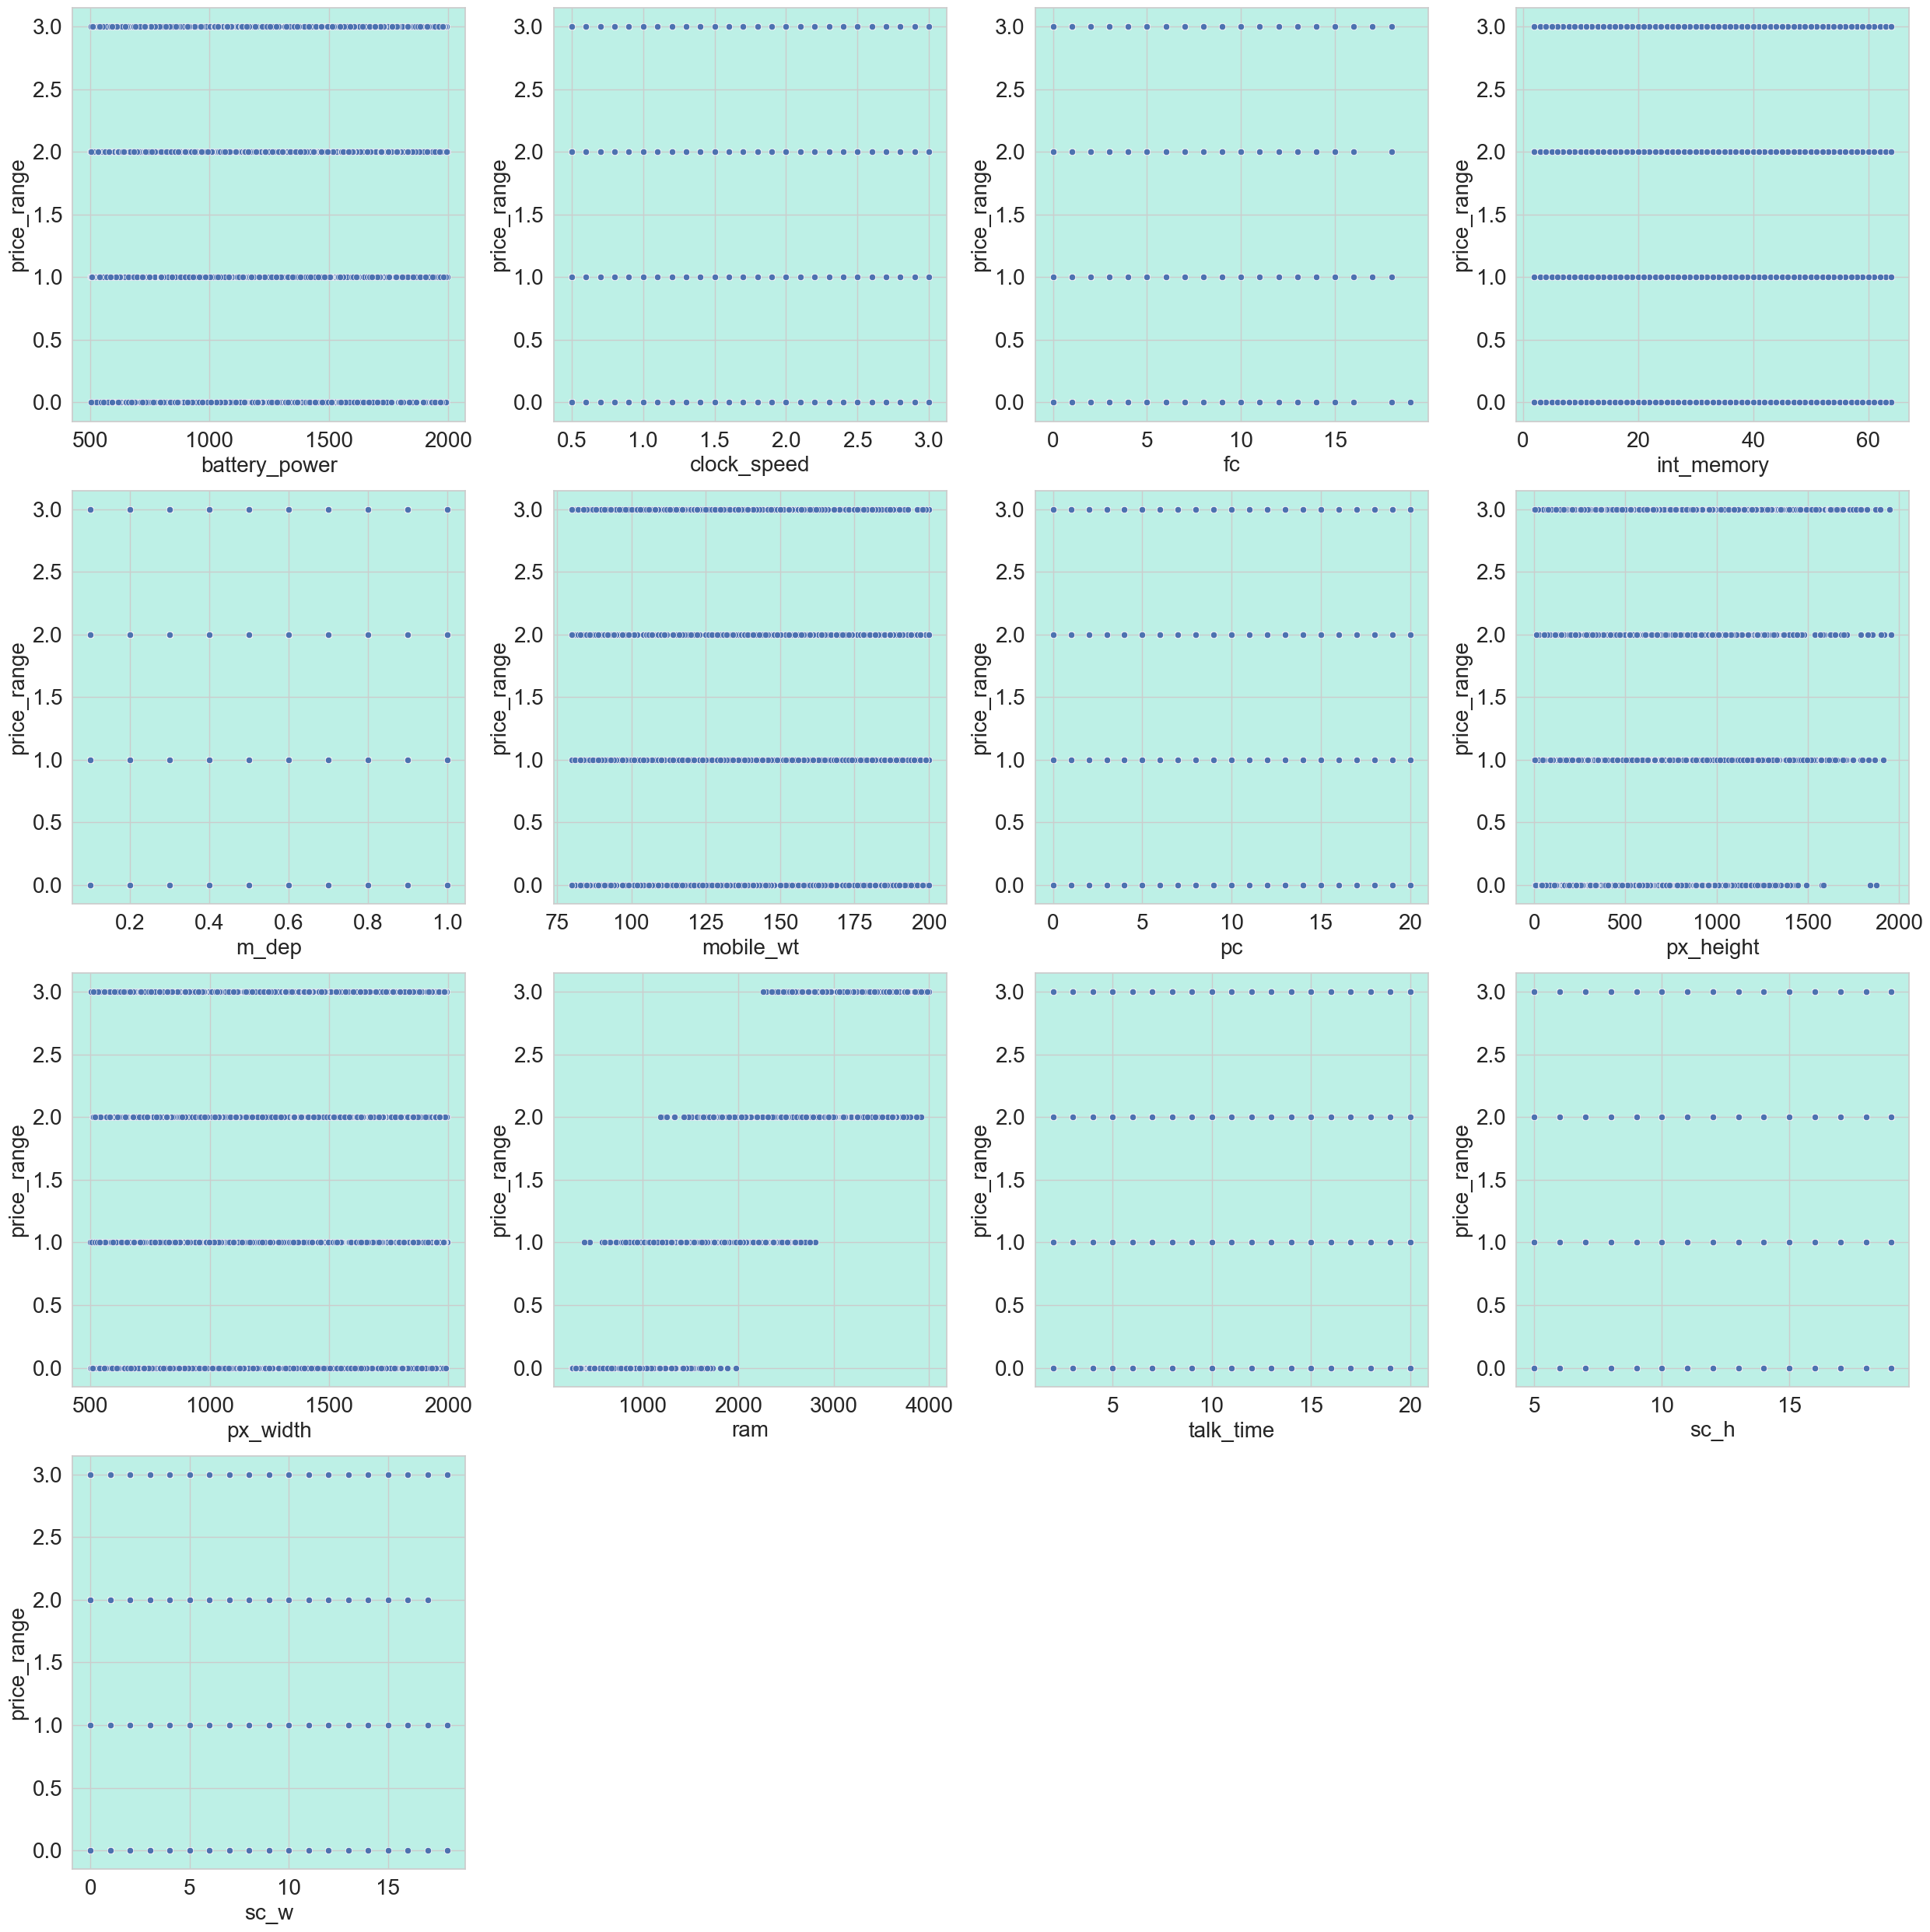

In [11]:
cont_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc',
             'px_height', 'px_width', 'ram', 'talk_time', 'sc_h', 'sc_w']
target = 'price_range'

fig, axs = plt.subplots(4, 4, figsize=(25, 25))

for i, feature in enumerate(cont_cols):
    row = i // 4
    col = i % 4
    ax = sns.scatterplot(data=Df_train, x=feature, y=target, ax=axs[row, col])
    ax.set_xlabel(feature, fontsize=20)
    ax.set_ylabel(target, fontsize=20)   
    ax.tick_params(axis='x', labelsize=20)  
    ax.tick_params(axis='y', labelsize=20) 
    ax.set_facecolor('#bdf0e6')

for i in range(len(cont_cols), 4 * 4):
    row = i // 4
    col = i % 4
    plt.delaxes(axs[row, col])

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* **Note:** 
    - Except for **px_height** and **ram**, the other features do not provide us with significant information
* **px_height:** 
   - The pixel range of cheap phones is **between 0 and 1500**, and it is practically not possible to purchase affordable phones with a pixel range of **1500 to 1960**.
   - We can purchase phones with any price range **(excluding cheap)** and any resolution.
* **ram:**
   - You can only purchase phones with RAM between **256 and 2000** at an **cheap price**.
   - You can only purchase phones with RAM between **480 and 2800** at an **moderate price**.
   - You can only purchase phones with RAM between **1100 and 3900** at an **expensive price**.
   - You can only purchase phones with RAM between **2200 and 3989** at a **very expensive price**.
   - In the RAM range of **256 to 1000**, phones can only be purchased at an **cheap and moderate price**.
   - In the RAM range of **3000 to 3989**, phones can only be purchased at an **expensive and very expensive price**

<a id="multivariate"></a>
# <b><span style='color:darkorange'>Step 4.3 |</span><span style='color:black'> Multivariate Analysis</span></b>

* In multivariate analysis, our goal is to understand the relationships and patterns among different variables. To achieve this, we can create various plots between the columns to examine the desired relationships and patterns

<Axes: >

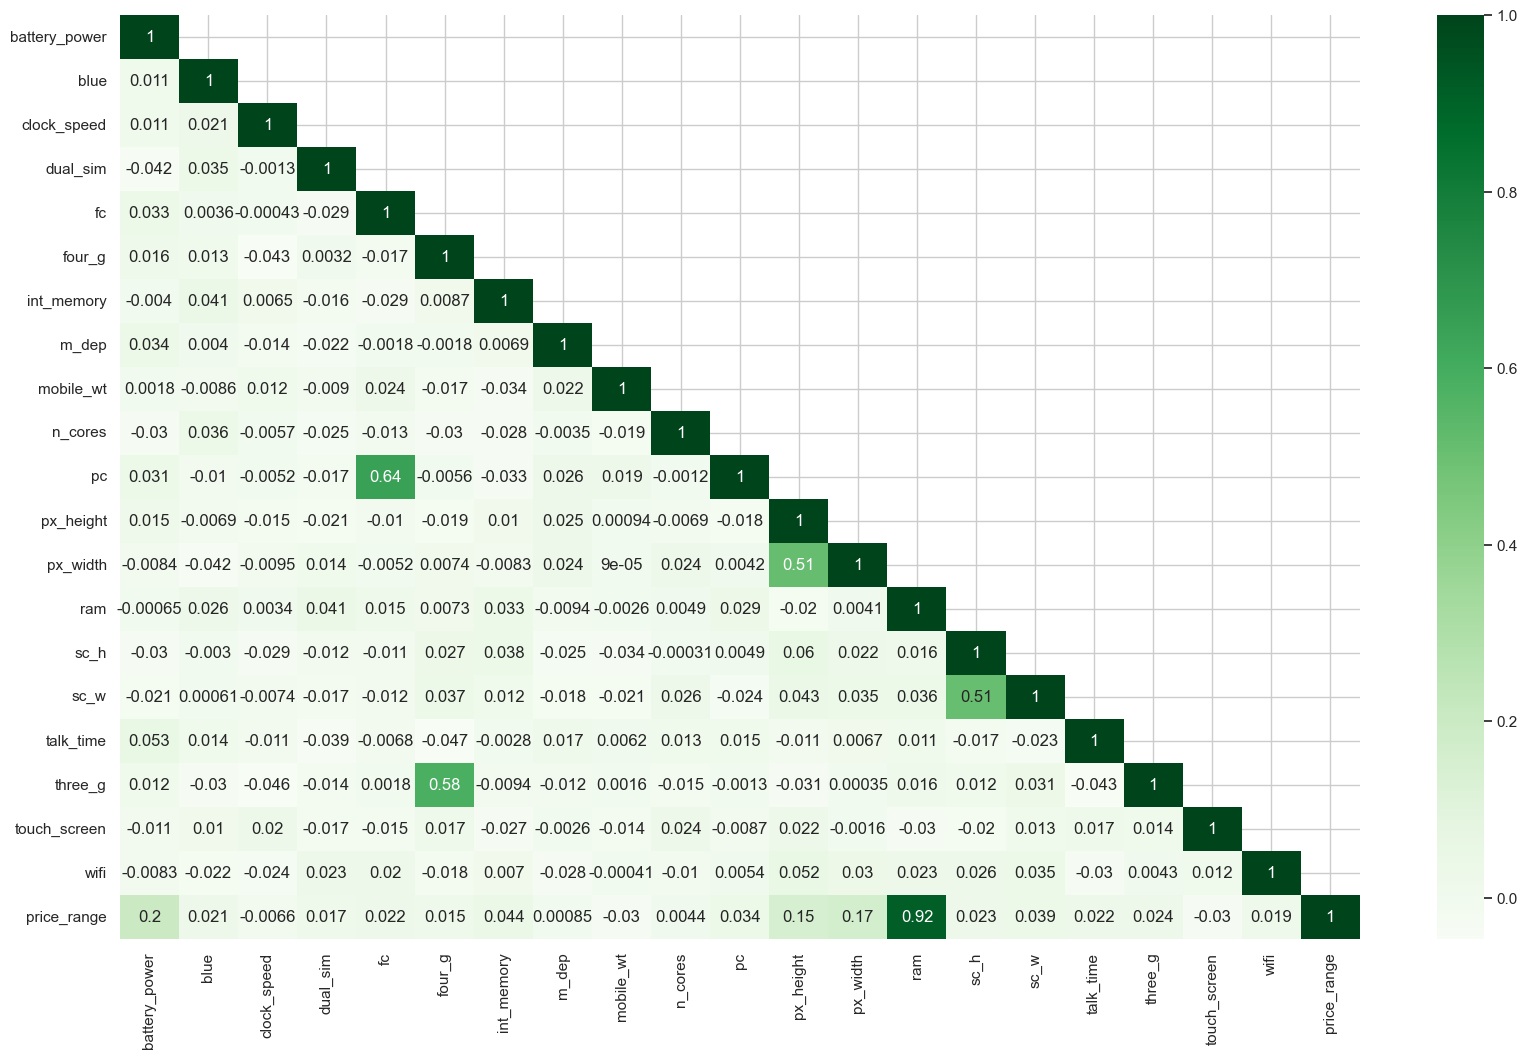

In [12]:
corr = Df_train.corr(method="pearson")     
fig, ax = plt.subplots(figsize=(20, 12))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True
sns.heatmap(corr, cmap='Greens' , mask=mask ,annot=True, ax=ax)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

- RAM & price_range: 
    - **strong** correlation 
- 4G & 3G: 
    - **moderate** correlation 
- sc_h & sc_w: 
    - **moderate** correlation
- pc & fc: 
    - **moderate** correlation
- px_width & px_height: 
    - **moderate** correlation

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Note:** Since taking plots between all columns may not be efficient, and in this project, we only need to examine the relationships between the target variable and the variables that have a high correlation coefficient, I have created several plots:

In [13]:
def Multivariate (x,y):
    g = sns.FacetGrid(Df_train, col="price_range", hue="price_range", palette="Greens")
    g.map(sns.scatterplot, x, y)
    g.set_axis_labels( x, y )
    plt.show() 

# <b><span style='color:darkorange'> px_width &  px_height & Price_range 👌

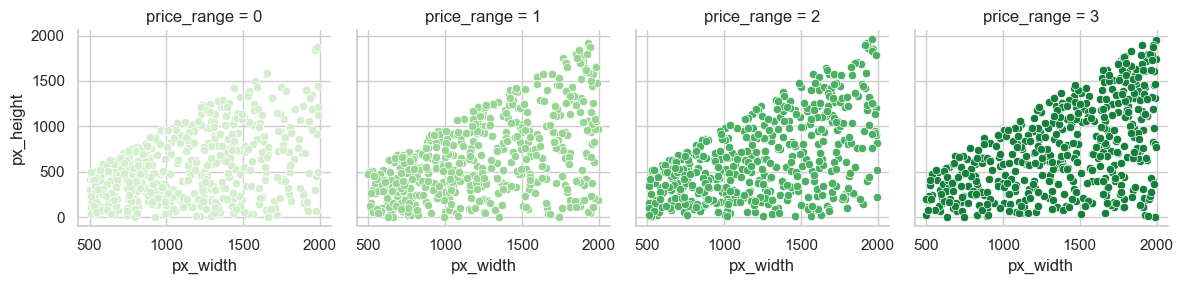

In [14]:
Multivariate ('px_width','px_height')

# <b><span style='color:darkorange'> sc_h &  sc_w & Price_range 👌

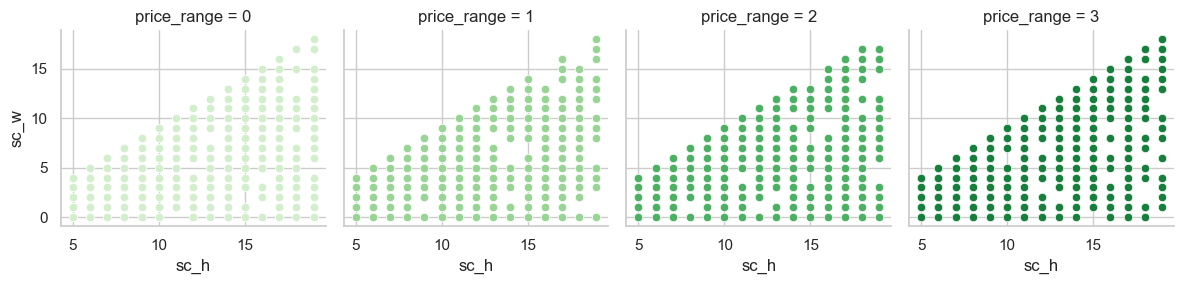

In [15]:
Multivariate ('sc_h','sc_w')

# <b><span style='color:darkorange'> pc &  fc & Price_range 👌

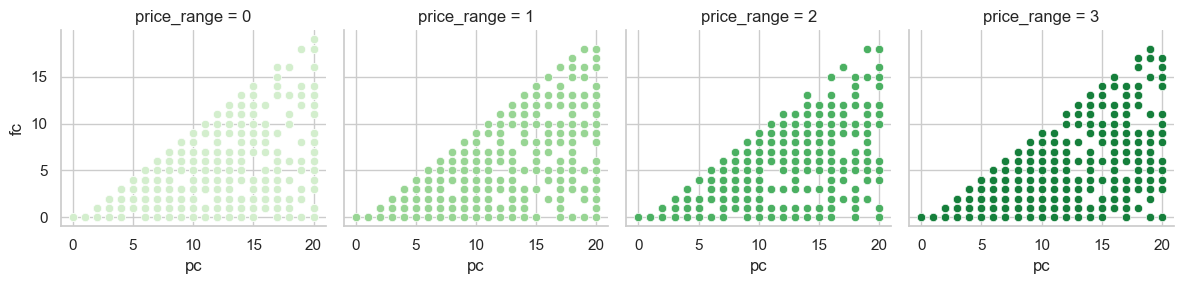

In [16]:
Multivariate ('pc','fc')

# <b><span style='color:darkorange'> Ram & Price_range 👌

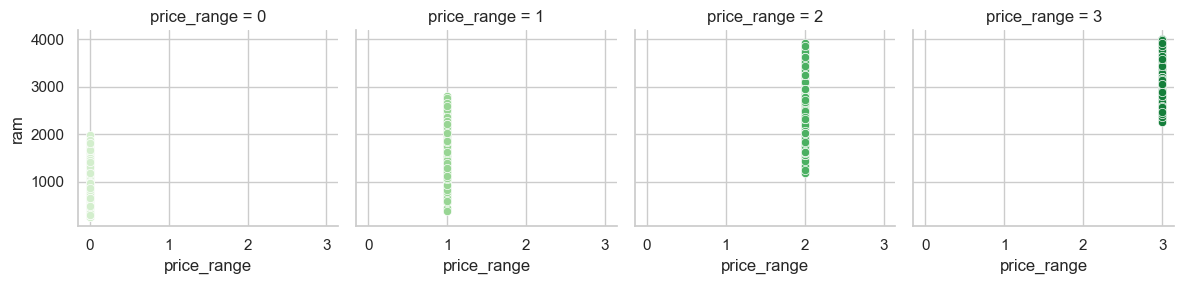

In [17]:
Multivariate ('price_range','ram')

<a id="preprocessing"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:15px 50px; padding:10px">Step 5: Data Preprocessing</p>

⬆️[Tabel of Contents](#contents_tabel)

<a id="removal"></a>
# <b><span style='color:darkorange'>Step 5.1 |</span><span style='color:black'> Irrelevant Feature Removal</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* Based on the analyses conducted so far, the **"id"** feature in our test dataset **should be removed**

In [18]:
data_test.head(5)

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [19]:
data_test=data_test.drop("id",axis=1)
data_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  16        226      1412  3476    12     7   
1      0.8        191        5  12        746       857  3895     6     0   
2      0.9        186        3   4       1270      1366  2396    17    10   
3      0.5         96        8  20        295      1752  3893    10     0   
4      0.5        108        6  18        749       810  1773    15     8   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
995    0.5        170        7  17        644       913  2121    14     8   
996    0.9        186        4   2       1152      1632  1933     8     1   
997    0.5         80        1  12        477       825  1223     5     0   
998    0.4        171        2  12         38       832  2509    15    11   
999    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 20 columns]

<a id="outlier"></a>
# <b><span style='color:darkorange'>Step 5.2 |</span><span style='color:black'> Outlier Treatment</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2> 

* I have **explained** in a comprehensive and detailed manner **how to detect and handle noise and outliers in a video**.
- **It would be my pleasure if you could grace my video with your insightful perspective**😊👌

🔍[Link](https://youtu.be/TRDHGN-a6Gs)👈

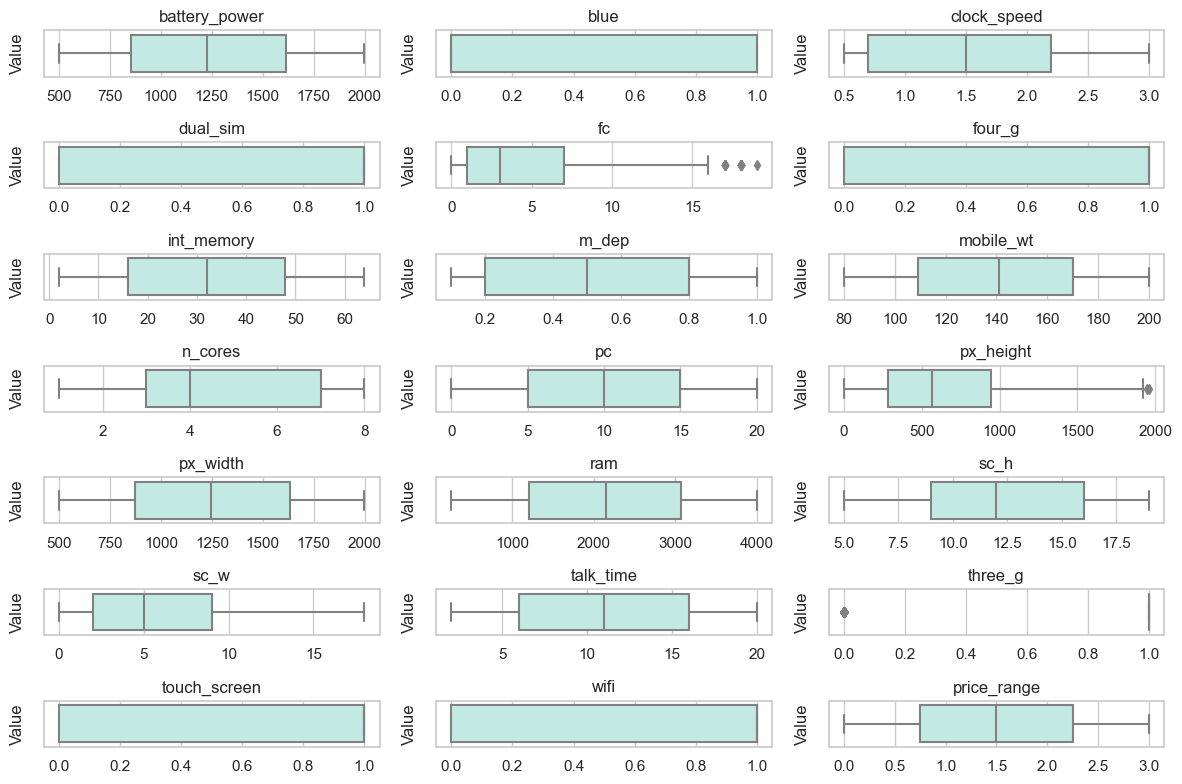

In [20]:
num_cols = 3
num_rows = 7
num_features = len(Df_train.columns)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
feature_num = 0

for i in range(num_rows):
    for j in range(num_cols):
        if feature_num < num_features:
            sns.boxplot(x=Df_train.iloc[:, feature_num], color='#bdf0e6', ax=axes[i, j])
            axes[i, j].set_title(Df_train.columns[feature_num])
            axes[i, j].set_ylabel('Value')
            axes[i, j].set_xlabel('')
            feature_num += 1
        else:
            axes[i, j].axis('off') 

plt.tight_layout()  
plt.show()   

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2> 

* Based on the **EDA analysis** I conducted and the **box plots** obtained here, as well as the **research** I conducted, the **noise and outlier range**s for **each feature** are as follows:
*
* **sc_w**: The data points **below 2** are considered as **noise in this column**
* **px_height**: The data points **below 5** are considered as **noise in this column**

In [21]:
sc_w=Df_train[Df_train['sc_w']<2].index
px_height=Df_train[Df_train['px_height']<5].index

In [22]:
print('The number of column noises sc_w:',len(sc_w),'\n'"The number of column noises px_height:",len(px_height))

The number of column noises sc_w: 390 
The number of column noises px_height: 9


<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* We remove the noises as they may have a negative impact on the model's accuracy and performance:

In [23]:
Df_train1=Df_train[Df_train['sc_w']>=2]
Df_train2=Df_train1[Df_train1['px_height']>=5]

In [24]:
len(Df_train2.index)

1605

<a id="missing"></a>
# <b><span style='color:darkorange'>Step 5.3 |</span><span style='color:black'> Missing Value Treatment</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* As we observed in **Step 3.1**, this dataset **does not have any missing data** 

In [25]:
Df_train2.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<a id="duplicate"></a>
# <b><span style='color:darkorange'>Step 5.4 |</span><span style='color:black'> duplicate data Treatment</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* As you can see, **we do not have any duplicate data in this dataset** 

In [26]:
duplicates=Df_train2.duplicated()
print(duplicates.sum())

0


<a id="decision"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:15px 50px; padding:10px">Step 6: Decision Tree Model Building</p>

⬆️[Tabel of Contents](#contents_tabel)

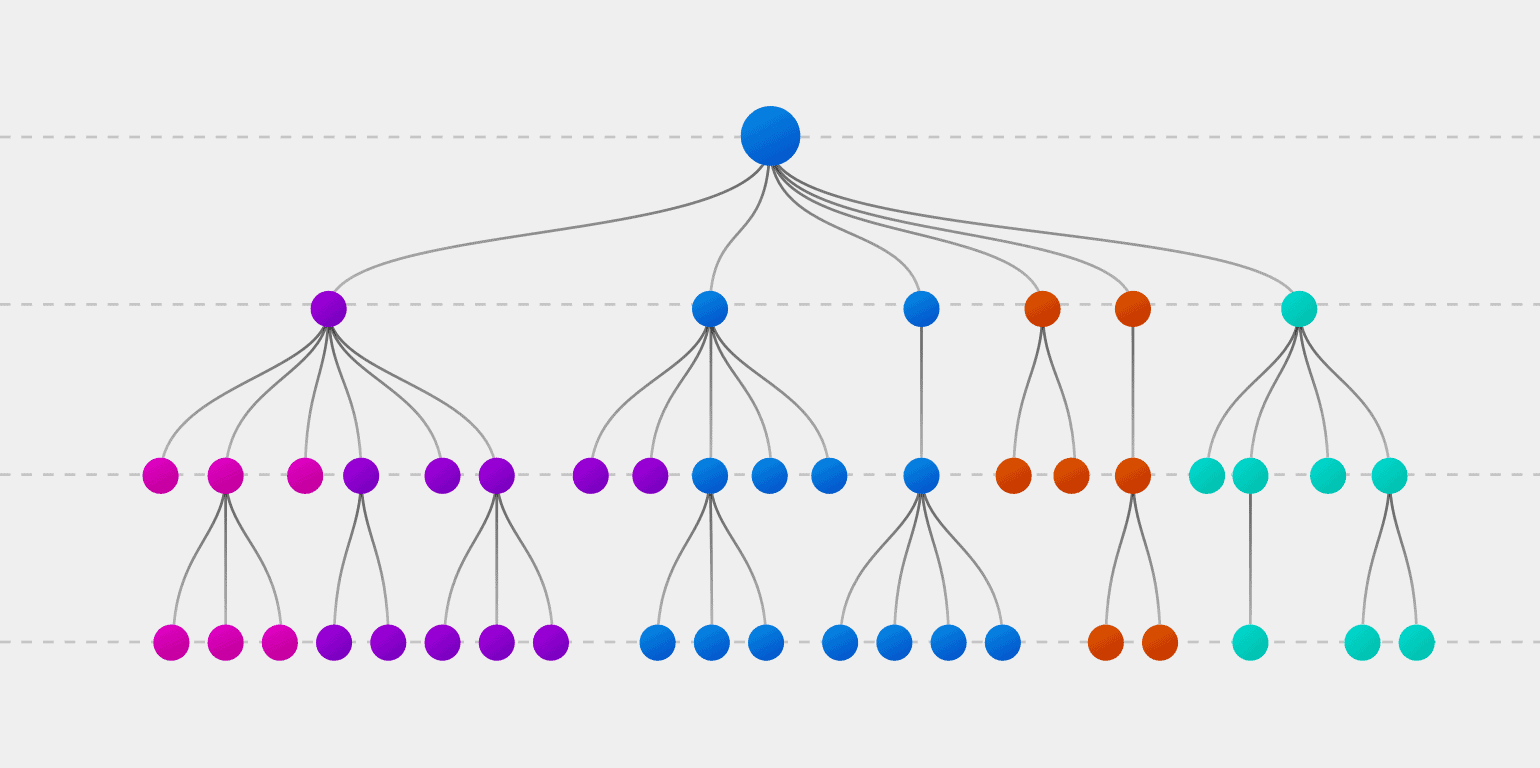

**Determine x and y**

In [27]:
df = Df_train2
x=df.drop("price_range",axis=1)
y=df["price_range"]

In [28]:
print("X shape:",x.shape,'\n'"Y shape:",y.shape)

X shape: (1605, 20) 
Y shape: (1605,)


**Determining the train and test sets**

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

In [30]:
print("x_train shape:",x_train.shape,'\n'"y_train shape:",y_train.shape,
      '\n'"x_test shape:",x_test.shape,'\n'"y_test shape:",y_test.shape)

x_train shape: (1284, 20) 
y_train shape: (1284,) 
x_test shape: (321, 20) 
y_test shape: (321,)


<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Note:**
* **Decision Trees do not require standard scaling of the data before model building**.
* Standard scaling is typically used for algorithms that are sensitive to the scale of the input features, such as distance-based algorithms like **KNN** and **SVM**.

<a id="grid_dts"></a>
# <b><span style='color:darkorange'>Step 6.1 |</span><span style='color:black'> Decision Tree Hyperparameter Tuning with GridSearchCV</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2> 

* I have explained the **process of tuning hyperparameters** and **improving accuracy in a video**.
- **It would be my pleasure if you could grace my video with your insightful perspective**😊👌

🔍[Link](https://youtu.be/_Kb_VrddKSw?si=r1f4xT4Q0tO_RqRA)👈

In [31]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 15),
              'min_samples_split': np.arange(1, 10),
              'min_samples_leaf': np.arange(2, 10),
              'max_features': [None,'sqrt', 'log2']} 

In [32]:
clf=DecisionTreeClassifier(random_state=0)

In [33]:
clf2_grid = GridSearchCV(clf, param_grid, n_jobs=-1)

In [34]:
start_time = time.time()

clf2_grid.fit(x_train, y_train)

end_time = time.time()

In [35]:
print("Best hyperparameters:\n", clf2_grid.best_params_, "\nTime:", int(end_time - start_time), "Seconds")

Best hyperparameters:
 {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 9} 
Time: 35 Seconds


<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Note:**
* I have written a function here to **Evaluate my model**.
* This function consists of an **ROC plot**, a **Classification report for the Test and Train data**, and a **confusion matrix**

In [36]:
def evaluation(model,x_train,x_test,y_train,y_test):
    print("-"*15,"Performace Model on Testset")
    print("-"*55)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    "\n"
    print("-"*15,"Performace Model on Trainset")
    print("-"*55)
    y_pred_train=model.predict(x_train)
    print(classification_report(y_train,y_pred_train))
    
# Calculate y_scores and binarize y_test
    y_scores = model.predict_proba(x_test)
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
# Calculate ROC curve and AUC for each class
    fpr, tpr, auc = dict(), dict(), dict()
    n_classes = y_test_binarized.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
        auc[i] = roc_auc_score(y_test_binarized[:, i], y_scores[:, i])

# Plot ROC curve for each class
    colors = cycle(['blue', 'red', 'green', 'orange'])
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC curve
    for i, color in zip(range(n_classes), colors):
        axes[0].plot(fpr[i], tpr[i], color=color, lw=2, label='Class {} (AUC = {:.2f})'.format(i, auc[i]))

    axes[0].plot([0, 1], [0, 1], 'k--', lw=2)  # Random guess line
    axes[0].set_xlim([0.0, 1.0])
    axes[0].set_ylim([0.0, 1.05])
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('ROC Plot')
    axes[0].legend(loc="lower right")

# Calculate confusion matrix
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1])
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('True Labels')
    axes[1].set_title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        81
           1       0.86      0.79      0.82        80
           2       0.76      0.81      0.79        81
           3       0.87      0.87      0.87        79

    accuracy                           0.85       321
   macro avg       0.86      0.85      0.85       321
weighted avg       0.86      0.85      0.85       321

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       323
           1       0.91      0.94      0.93       318
           2       0.94      0.89      0.91       327
           3       0.94      0.98      0.96       316

    accuracy                           0.94      1284
   macro avg       0.94      0.94     

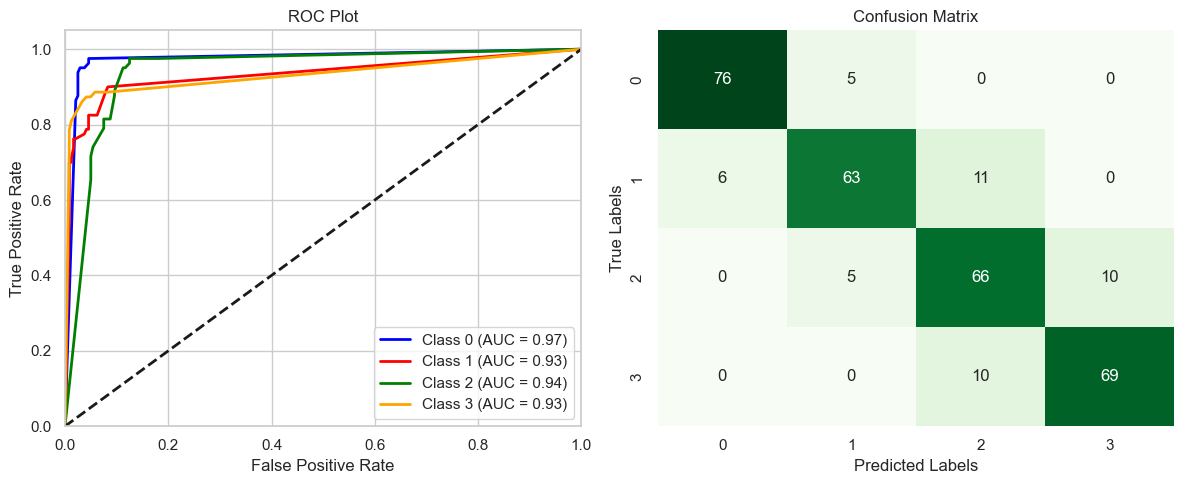

In [37]:
evaluation(clf2_grid,x_train,x_test,y_train,y_test)

<a id="Selection_dts"></a>
# <b><span style='color:darkorange'>Step 6.2 |</span><span style='color:black'> Feature Selection </span></b>

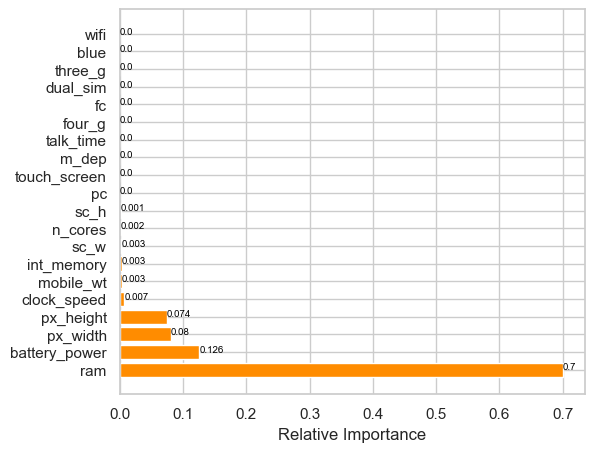

In [38]:
feature_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                 'touch_screen', 'wifi']

importance = clf2_grid.best_estimator_.feature_importances_
sorted_indices = importance.argsort()[::-1]

plt.figure(figsize=(6, 5))
plt.barh(range(len(sorted_indices)), importance[sorted_indices], color='darkorange', align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Relative Importance')

for i, v in enumerate(importance[sorted_indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize=7)

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Note:**
* Here, we remove the features whose importance in modeling is **less than 0.01** and create a new model:

In [39]:
x=pd.DataFrame(Df_train2,columns=['ram','battery_power','px_width','px_height'])
y=Df_train2["price_range"]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

In [41]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 15),
              'min_samples_split': np.arange(1, 10),
              'min_samples_leaf': np.arange(2, 10),
              'max_features': [None,'sqrt', 'log2']} 

In [42]:
clf=DecisionTreeClassifier(random_state=0)

In [43]:
clf3_grid = GridSearchCV(clf, param_grid, n_jobs=-1)

In [44]:
start_time = time.time()

clf3_grid.fit(x_train, y_train)

end_time = time.time()

In [45]:
print("Best hyperparameters:\n", clf3_grid.best_params_, "\nTime:", int(end_time - start_time), "Seconds")

Best hyperparameters:
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 1} 
Time: 27 Seconds


--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        81
           1       0.89      0.84      0.86        80
           2       0.80      0.86      0.83        81
           3       0.91      0.86      0.88        79

    accuracy                           0.88       321
   macro avg       0.88      0.88      0.88       321
weighted avg       0.88      0.88      0.88       321

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.97      0.96      0.96       318
           2       0.95      0.96      0.96       327
           3       0.97      0.98      0.98       316

    accuracy                           0.97      1284
   macro avg       0.97      0.97     

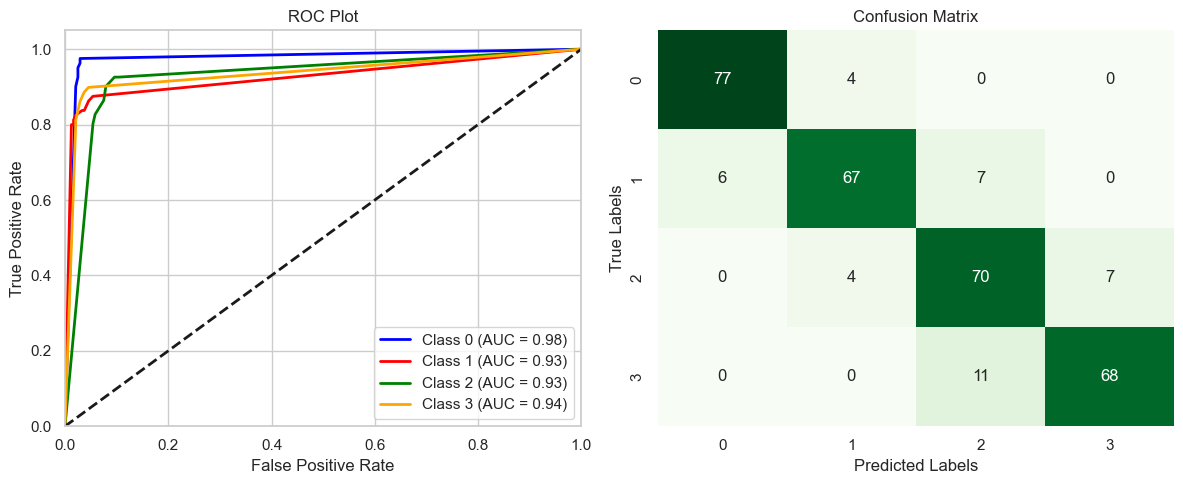

In [46]:
evaluation(clf3_grid,x_train,x_test,y_train,y_test)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2> 

* As you can see, our model's accuracy has improved🏆😁
--

<a id="Cross_dts"></a>
# <b><span style='color:darkorange'>Step 6.3 |</span><span style='color:black'> Cross Validation </span></b>

In [49]:
best_model_DTS = clf3_grid.best_estimator_
scores = cross_val_score(best_model_DTS, x_train, y_train, cv=10)

In [50]:
score = cross_val_score(best_model_DTS, x_train, y_train, cv=10, scoring='accuracy')
clf3_cv_score = score.mean()
clf3_cv_stdev = np.std(scores)

print('Cross Validation Accuracy scores are:\n {}'.format(score))
Accuracy  = ['Cross Validation Accuracy ']
DF_C = pd.DataFrame({'CV Mean':clf3_cv_score,'Std':clf3_cv_stdev},index=Accuracy )
DF_C

Cross Validation Accuracy scores are:
 [0.82945736 0.79069767 0.89147287 0.84496124 0.859375   0.8671875
 0.8828125  0.8359375  0.859375   0.859375  ]


CV Mean      Std
Cross Validation Accuracy   0.852065  0.02734

<a id="Overfitting_dts"></a>
# <b><span style='color:darkorange'>Step 6.4 |</span><span style='color:black'> Overfitting Treatment </span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2> 

* As you can see, there is a **0.09** difference between the **accuracy on the test** data and the **accuracy on the training** data, indicating the presence of **overfitting in the decision tree model**.
    
<h2 align="left"><font color=#ff8c00>Solution:</font></h2> 
    
* Reducing the depth of the trees

* Increasing min_samples_split

* Increasing min_samples_leaf

In [51]:
x=pd.DataFrame(Df_train2,columns=['ram','battery_power','px_width','px_height'])
y=Df_train2["price_range"]

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Note:**
* Here, we manually modify the **hyperparameters of this decision tree model** in the **hope of reducing overfitting**:

In [53]:
clf4=DecisionTreeClassifier(criterion= 'entropy',max_depth=6 ,min_samples_split=5,min_samples_leaf=10, max_features= None,random_state=0)
clf4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       min_samples_split=5, random_state=0)

--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        81
           1       0.79      0.86      0.83        80
           2       0.80      0.84      0.82        81
           3       0.93      0.86      0.89        79

    accuracy                           0.86       321
   macro avg       0.86      0.86      0.86       321
weighted avg       0.86      0.86      0.86       321

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       323
           1       0.84      0.90      0.87       318
           2       0.86      0.87      0.87       327
           3       0.96      0.92      0.94       316

    accuracy                           0.90      1284
   macro avg       0.91      0.90     

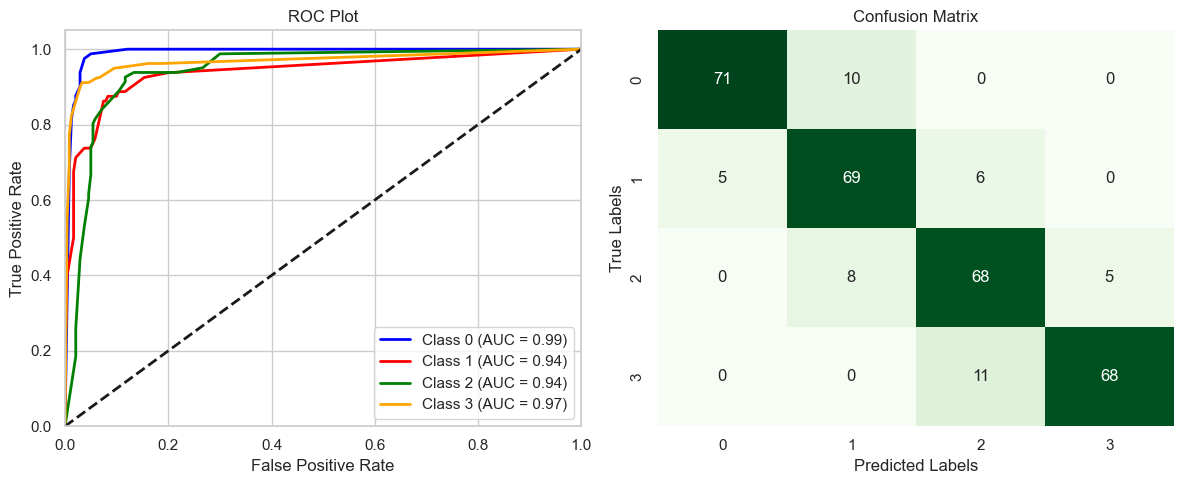

In [54]:
evaluation(clf4,x_train,x_test,y_train,y_test)

<a id="duplicate"></a>
# </span><span style='color:black'> Cross Validation </span></b>

In [55]:
scores = cross_val_score(clf4, x_train, y_train, cv=10)

In [56]:
score = cross_val_score(clf4, x_train, y_train, cv=10, scoring='accuracy')
clf4_cv_score = score.mean()
clf4_cv_stdev = np.std(scores)

print('Cross Validation Accuracy scores are:\n {}'.format(score))
Accuracy  = ['Cross Validation Accuracy ']
DF_C = pd.DataFrame({'CV Mean':clf4_cv_score,'Std':clf4_cv_stdev},index=Accuracy )
DF_C

Cross Validation Accuracy scores are:
 [0.80620155 0.82945736 0.81395349 0.82170543 0.8203125  0.8515625
 0.84375    0.8046875  0.7890625  0.8515625 ]


CV Mean       Std
Cross Validation Accuracy   0.823226  0.019908

In [57]:
best_model_DTS=clf4

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2> 

* As you can see, the difference in accuracy between the test and training data has **decreased by 0.04**. 
* However, overall, the accuracy on both the training and test data is lower than the previous model.

<a id="best_dts"></a>
# <b><span style='color:darkorange'>Step 6.5 |</span><span style='color:black'> Best DTS Model 🏆 </span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* **Name Model:** Decision Tree ( best_model_DTS )
* **Accuracy:** Test Data: 0.86 _ Train Data: 0.90
* **Overfitting:**  No
* **Cross Validation Accuracy:** __ **CV Mean:** 0.823226 __ **Std:** 0.019908

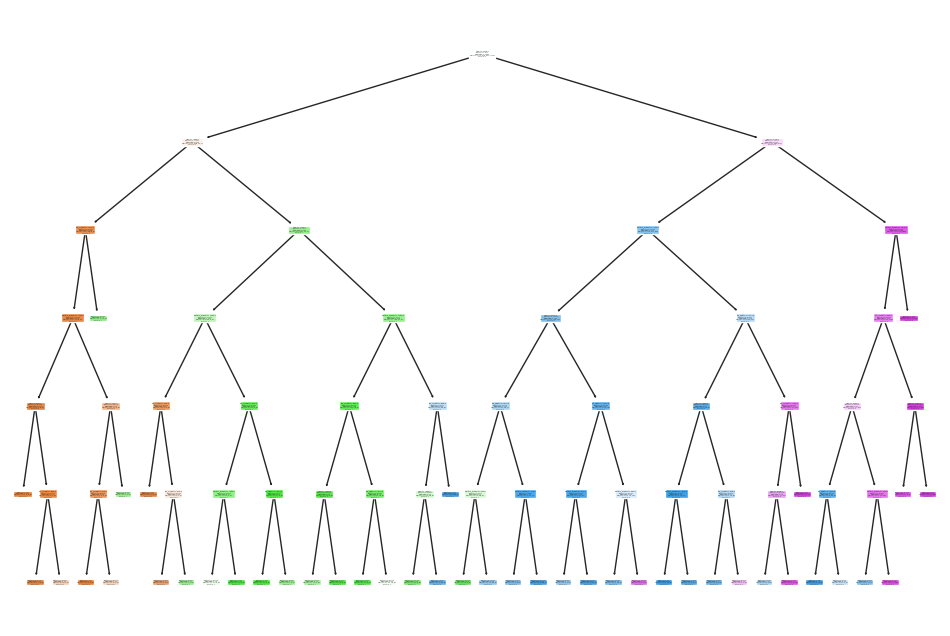

In [58]:
fig = plt.figure(figsize=(12, 8))
plot= tree.plot_tree(best_model_DTS, feature_names=x.columns, class_names=['0','1','2','3'], filled=True)
plt.show()

--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        81
           1       0.79      0.86      0.83        80
           2       0.80      0.84      0.82        81
           3       0.93      0.86      0.89        79

    accuracy                           0.86       321
   macro avg       0.86      0.86      0.86       321
weighted avg       0.86      0.86      0.86       321

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       323
           1       0.84      0.90      0.87       318
           2       0.86      0.87      0.87       327
           3       0.96      0.92      0.94       316

    accuracy                           0.90      1284
   macro avg       0.91      0.90     

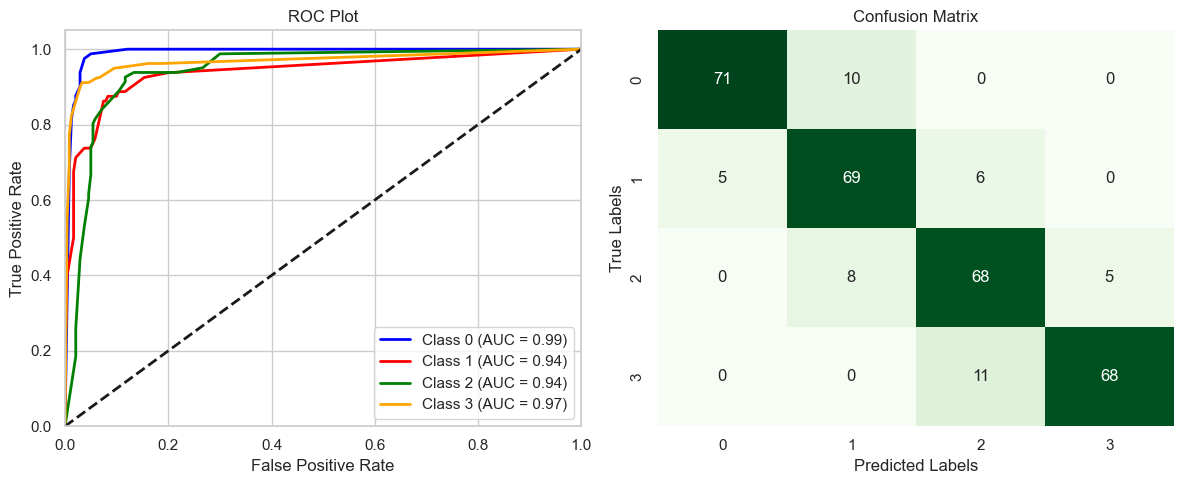

In [59]:
evaluation(best_model_DTS,x_train,x_test,y_train,y_test)

In [60]:
DF_C

CV Mean       Std
Cross Validation Accuracy   0.823226  0.019908

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Note:**
* Here, I am writing a function so that **we can assess the accuracy of the models at the end:**

In [61]:
def metrics_calculator(clf, x_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(x_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [62]:
dt_result = metrics_calculator(best_model_DTS, x_test, y_test, 'Decision Tree')

<a id="rf"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:15px 50px; padding:10px">Step 7: Random Forest Model Building</p>

⬆️[Tabel of Contents](#contents_tabel)

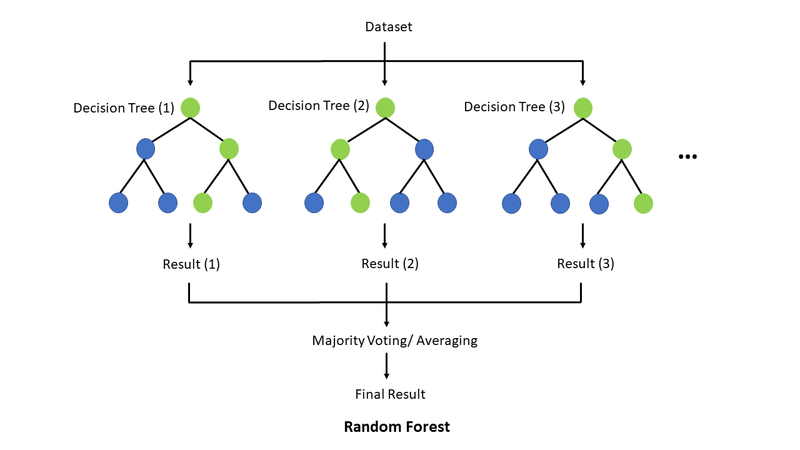

**Determine x and y**

In [63]:
df = Df_train2
x=df.drop("price_range",axis=1)
y=df["price_range"]

In [64]:
print("X shape:",x.shape,'\n'"Y shape:",y.shape)

X shape: (1605, 20) 
Y shape: (1605,)


**Determining the train and test sets**

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

In [66]:
print("x_train shape:",x_train.shape,'\n'"y_train shape:",y_train.shape,
      '\n'"x_test shape:",x_test.shape,'\n'"y_test shape:",y_test.shape)

x_train shape: (1284, 20) 
y_train shape: (1284,) 
x_test shape: (321, 20) 
y_test shape: (321,)


<a id="grid_rf"></a>
# <b><span style='color:darkorange'>Step 7.1 |</span><span style='color:black'> Random Forest Hyperparameter Tuning with RandomSearchCV</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2> 

* I have explained the **process of tuning hyperparameters** and **improving accuracy in a video**.
- **It would be my pleasure if you could grace my video with your insightful perspective**😊👌

🔍[Link](https://youtu.be/_Kb_VrddKSw?si=r1f4xT4Q0tO_RqRA)👈

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Note:**
* Since obtaining hyperparameters for the **Random Forest algorithm is time consuming**, 
* **we use random search CV here:**

In [67]:
param_rand = {
    'n_estimators': [70, 90,120, 150,180,200,300,400],
    "criterion": ["gini", "entropy",'log_loss'],
    "max_depth": np.arange(6, 18),
    "min_samples_split": np.arange(1, 12),
    "min_samples_leaf": np.arange(1, 12),
    "max_features": ["auto", "sqrt", "log2"]
}

In [68]:
clf=RandomForestClassifier(bootstrap=True,random_state=0)

In [69]:
clf_random = RandomizedSearchCV(clf, param_rand, n_iter=20, cv=5)

In [70]:
start_time = time.time()

clf_random.fit(x_train,y_train)

end_time = time.time()

In [71]:
print("Best hyperparameters:\n", clf_random.best_params_, "\nTime:", int(end_time - start_time), "Seconds")

Best hyperparameters:
 {'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 11, 'criterion': 'log_loss'} 
Time: 44 Seconds


--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        81
           1       0.85      0.80      0.83        80
           2       0.80      0.85      0.83        81
           3       0.94      0.86      0.90        79

    accuracy                           0.87       321
   macro avg       0.87      0.87      0.87       321
weighted avg       0.87      0.87      0.87       321

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       0.99      0.99      0.99       318
           2       1.00      1.00      1.00       327
           3       1.00      1.00      1.00       316

    accuracy                           1.00      1284
   macro avg       1.00      1.00     

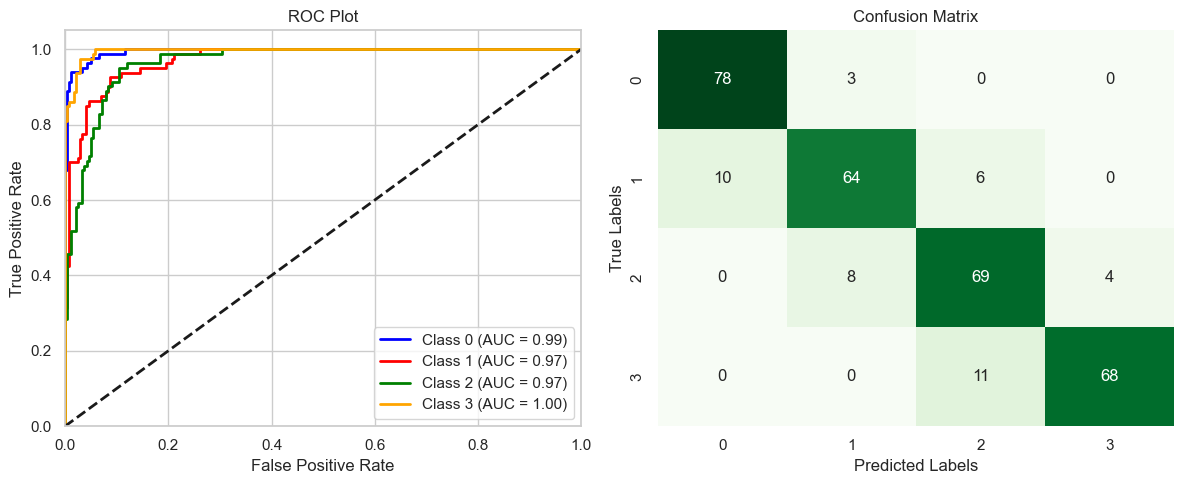

In [72]:
evaluation(clf_random,x_train,x_test,y_train,y_test)

<a id="Selection_rf"></a>
# <b><span style='color:darkorange'>Step 7.3 |</span><span style='color:black'> Feature Selection </span></b>

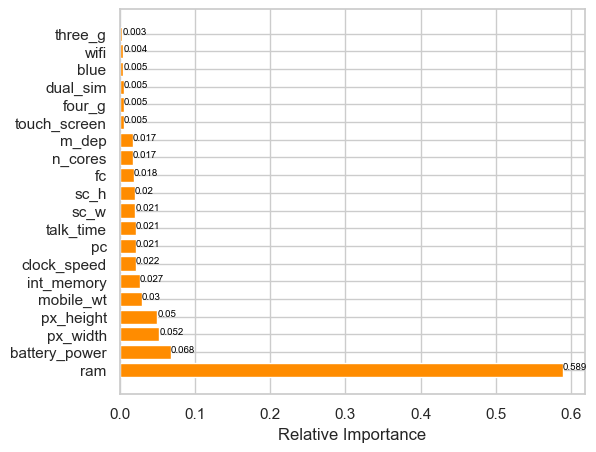

In [73]:
feature_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                 'touch_screen', 'wifi']

importance = clf_random.best_estimator_.feature_importances_
sorted_indices = importance.argsort()[::-1]

plt.figure(figsize=(6, 5))
plt.barh(range(len(sorted_indices)), importance[sorted_indices], color='darkorange', align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Relative Importance')

for i, v in enumerate(importance[sorted_indices]):
    plt.text(v, i, str(round(v, 3)), color='black', fontsize=7)

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Note:**
* Here, we remove the features whose importance in modeling is **less than 0.01** and create a new model:

In [74]:
x=pd.DataFrame(Df_train2,columns=['ram','battery_power','px_width','px_height','mobile_wt','int_memory','pc','talk_time'
                                 ,'sc_w','clock_speed','sc_h','n_cores','fc','m_dep'])
y=Df_train2["price_range"]

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

In [76]:
param_rand = {
    'n_estimators': [70, 90,120, 150,180,200,300,400],
    "criterion": ["gini", "entropy",'log_loss'],
    "max_depth": np.arange(6, 18),
    "min_samples_split": np.arange(1, 12),
    "min_samples_leaf": np.arange(1, 12),
    "max_features": ["auto", "sqrt", "log2"]
}

In [77]:
clf=RandomForestClassifier(bootstrap=True, random_state=0)

In [78]:
clf2_random = RandomizedSearchCV(clf, param_rand, n_iter=300, cv=5)

In [79]:
start_time = time.time()

clf2_random.fit(x_train,y_train)

end_time = time.time()

In [80]:
print("Best hyperparameters:\n", clf2_random.best_params_ , "\nTime:", int(end_time - start_time), "Seconds")

Best hyperparameters:
 {'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 12, 'criterion': 'entropy'} 
Time: 605 Seconds


--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        81
           1       0.85      0.78      0.81        80
           2       0.84      0.85      0.85        81
           3       0.94      0.94      0.94        79

    accuracy                           0.88       321
   macro avg       0.88      0.88      0.88       321
weighted avg       0.88      0.88      0.88       321

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       318
           2       1.00      1.00      1.00       327
           3       1.00      1.00      1.00       316

    accuracy                           1.00      1284
   macro avg       1.00      1.00     

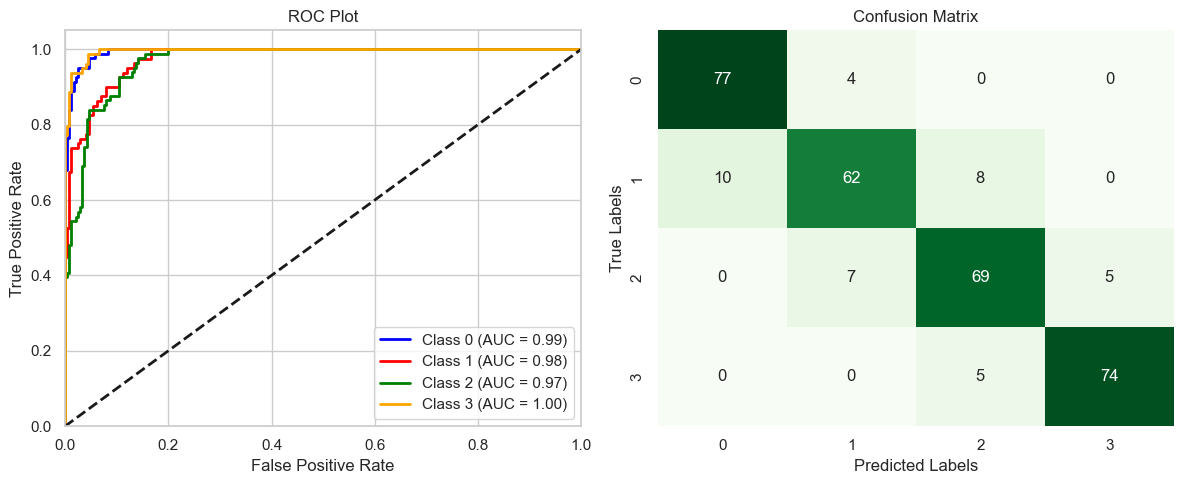

In [81]:
evaluation(clf2_random,x_train,x_test,y_train,y_test)

<a id="Cross_rf"></a>
# <b><span style='color:darkorange'>Step 7.4 |</span><span style='color:black'> Cross Validation </span></b>

In [82]:
best_model_RF = clf2_random.best_estimator_

In [83]:
score = cross_val_score(best_model_RF, x_train, y_train, cv=10, scoring='accuracy')
clf2_cv_score = score.mean()
clf2_cv_stdev = np.std(scores)

print('Cross Validation Accuracy scores are:\n {}'.format(score))
Accuracy  = ['Cross Validation Accuracy ']
DF_C = pd.DataFrame({'CV Mean':clf2_cv_score,'Std':clf2_cv_stdev},index=Accuracy )
DF_C

Cross Validation Accuracy scores are:
 [0.82945736 0.82945736 0.89147287 0.89147287 0.8984375  0.890625
 0.90625    0.9140625  0.8671875  0.9140625 ]


CV Mean       Std
Cross Validation Accuracy   0.883249  0.019908

<a id="Overfitting_rf"></a>
# <b><span style='color:darkorange'>Step 7.5 |</span><span style='color:black'> Overfitting Treatment </span></b>

In [84]:
x=pd.DataFrame(Df_train2,columns=['ram','battery_power','px_width','px_height','mobile_wt','int_memory','pc','talk_time'
                                 ,'sc_w','clock_speed','sc_h','n_cores','fc','m_dep'])
y=Df_train2["price_range"]

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

In [86]:
clf3=RandomForestClassifier(n_estimators= 300,criterion= 'log_loss',max_depth=5 ,min_samples_split=6,min_samples_leaf=10
                            ,max_features= 'auto' ,random_state=0)
clf3.fit(x_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=5, max_features='auto',
                       min_samples_leaf=10, min_samples_split=6,
                       n_estimators=300, random_state=0)

--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        81
           1       0.79      0.74      0.76        80
           2       0.86      0.77      0.81        81
           3       0.94      0.96      0.95        79

    accuracy                           0.86       321
   macro avg       0.86      0.86      0.86       321
weighted avg       0.86      0.86      0.86       321

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       323
           1       0.86      0.83      0.85       318
           2       0.88      0.86      0.87       327
           3       0.98      0.98      0.98       316

    accuracy                           0.91      1284
   macro avg       0.91      0.91     

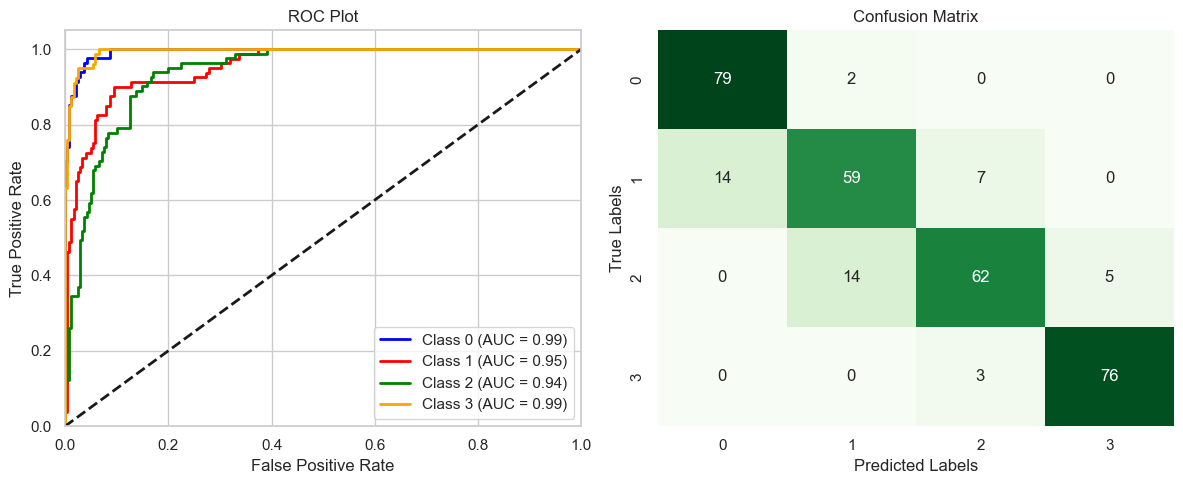

In [87]:
evaluation(clf3,x_train,x_test,y_train,y_test)

In [88]:
scores = cross_val_score(clf4, x_train, y_train, cv=10)
score = cross_val_score(clf3, x_train, y_train, cv=10, scoring='accuracy')
clf3_cv_score = score.mean()
clf3_cv_stdev = np.std(scores)

print('Cross Validation Accuracy scores are:\n {}'.format(score))
Accuracy  = ['Cross Validation Accuracy ']
DF_C = pd.DataFrame({'CV Mean':clf3_cv_score,'Std':clf3_cv_stdev},index=Accuracy )
DF_C

Cross Validation Accuracy scores are:
 [0.78294574 0.79844961 0.87596899 0.86046512 0.828125   0.828125
 0.859375   0.8671875  0.8515625  0.8046875 ]


CV Mean       Std
Cross Validation Accuracy   0.835689  0.016682

<a id="best_rf"></a>
# <b><span style='color:darkorange'>Step7.6 |</span><span style='color:black'> Best RF Model 🏆 </span></b>

In [89]:
best_model_RF=clf3

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* **Name Model:** Random Forest ( best_model_RF )
* **Accuracy:** Test Data: 0.86 _ Train Data: 0.91
* **Overfitting:**  No
* **Cross Validation Accuracy:** __ **CV Mean:** 0.835689 __ **Std:** 0.019908

--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        81
           1       0.79      0.74      0.76        80
           2       0.86      0.77      0.81        81
           3       0.94      0.96      0.95        79

    accuracy                           0.86       321
   macro avg       0.86      0.86      0.86       321
weighted avg       0.86      0.86      0.86       321

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       323
           1       0.86      0.83      0.85       318
           2       0.88      0.86      0.87       327
           3       0.98      0.98      0.98       316

    accuracy                           0.91      1284
   macro avg       0.91      0.91     

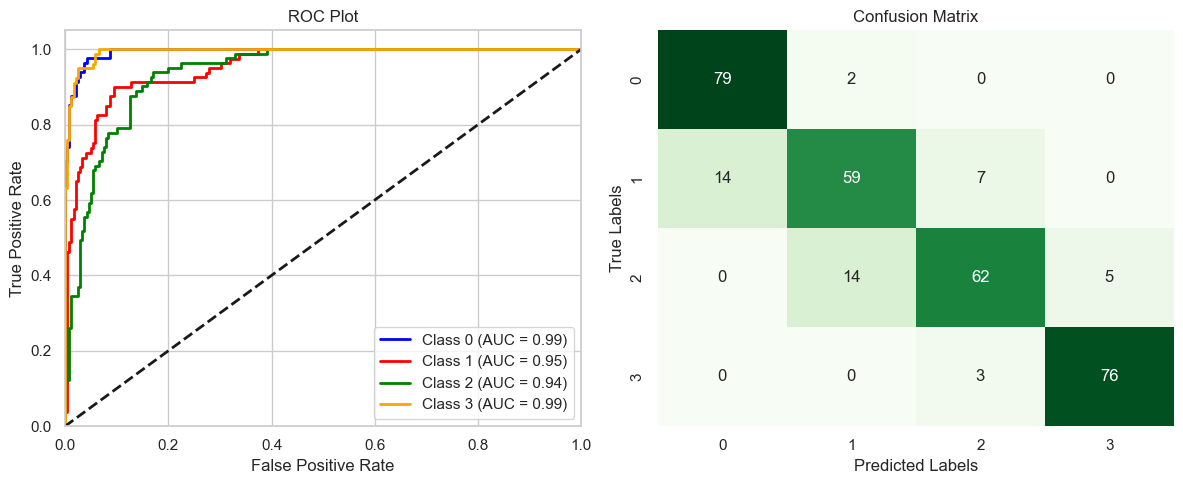

In [90]:
evaluation(best_model_RF,x_train,x_test,y_train,y_test)

In [91]:
DF_C

CV Mean       Std
Cross Validation Accuracy   0.835689  0.016682

In [92]:
rf_result = metrics_calculator(best_model_RF, x_test, y_test, 'Random Forest')

<a id="svm"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:15px 50px; padding:10px">Step 8: SVM Model Building</p>

⬆️[Tabel of Contents](#contents_tabel)

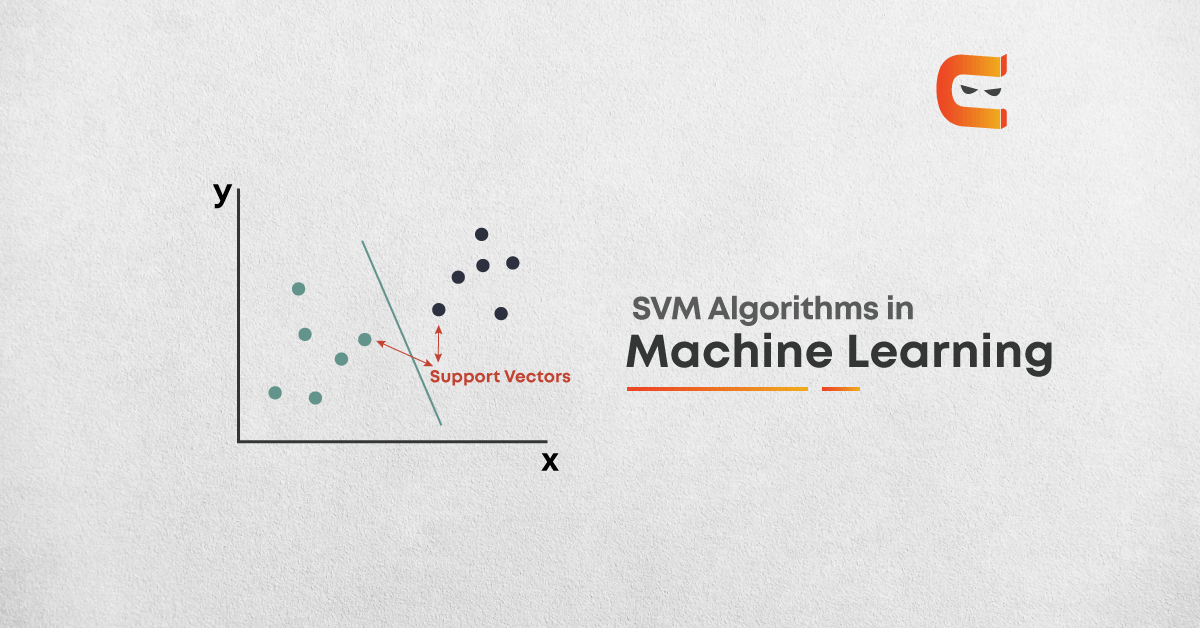

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Note:**
* Since this algorithm is **not sensitive to outliers**, we use the **original dataset for modeling**:

In [93]:
df = Df_train
x=df.drop("price_range",axis=1)
y=df["price_range"]

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,stratify=y)

<a id="Scale_svm"></a>
# <b><span style='color:darkorange'>Step 8.1 |</span><span style='color:black'> Scale Data using Standard Scaler</span></b>

In [95]:
# Scale the training and test data using Standard Scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert training and test sets from numpy array to pandas dataframes
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

<a id="grid_svm"></a>
# <b><span style='color:darkorange'>Step 8.2 |</span><span style='color:black'> SVM Hyperparameter Tuning with GridSearchCV</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2> 

* I have explained the **process of tuning hyperparameters** and **improving accuracy in a video**.
- **It would be my pleasure if you could grace my video with your insightful perspective**😊👌

🔍[Link](https://youtu.be/_Kb_VrddKSw?si=r1f4xT4Q0tO_RqRA)👈

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Note:**
* obtaining hyperparameters for this algorithm is time consuming, we performed a manual investigation and found that using a **linear kernel resulted in higher accuracy**:

In [96]:
param_grid = {'kernel': ['linear'],
               'C': [ 0.1,0.03,0.05,0.08,1,10,30,50,51,52,53,54,55,56,57,60,100]
             }

In [97]:
svm = SVC(probability=True, random_state=0)

In [98]:
svm_grid = GridSearchCV(svm, param_grid, n_jobs=-1)

In [99]:
start_time = time.time()

svm_grid.fit(x_train, y_train)

end_time = time.time()

In [100]:
print("Best hyperparameters:\n", svm_grid.best_params_, "\nTime:", int(end_time - start_time), "Seconds")

Best hyperparameters:
 {'C': 51, 'kernel': 'linear'} 
Time: 10 Seconds


--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.99      0.97      0.98       100
           2       0.97      0.98      0.98       100
           3       0.99      0.98      0.98       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       0.98      0.97      0.98       400
           2       0.98      0.98      0.98       400
           3       0.99      0.99      0.99       400

    accuracy                           0.99      1600
   macro avg       0.99      0.99     

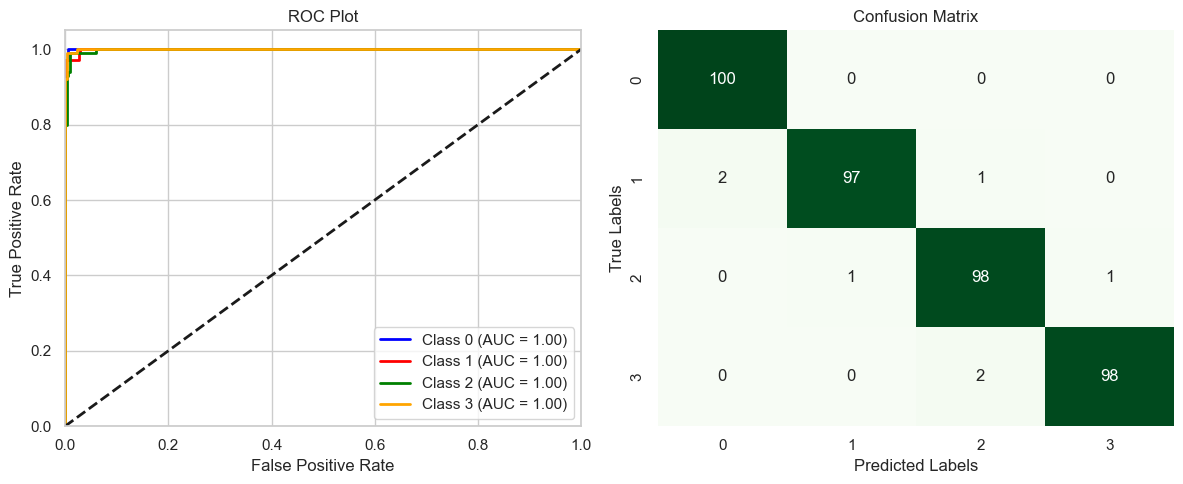

In [101]:
evaluation(svm_grid,x_train,x_test,y_train,y_test)

<a id="Cross_svm"></a>
# <b><span style='color:darkorange'>Step 8.3 |</span><span style='color:black'> Cross Validation </span></b>

In [102]:
best_model_SVM = svm_grid.best_estimator_

score = cross_val_score(best_model_SVM, x_train, y_train, cv=10, scoring='accuracy')
svm_cv_score = score.mean()
svm_cv_stdev = np.std(score)

print('Cross Validation Accuracy scores are:\n {}'.format(score))
Accuracy  = ['Cross Validation Accuracy ']
DF_C = pd.DataFrame({'CV Mean':svm_cv_score,'Std':svm_cv_stdev},index=Accuracy )
DF_C

Cross Validation Accuracy scores are:
 [0.96875 0.975   0.975   0.96875 0.95625 0.9875  0.98125 0.975   0.93125
 0.975  ]


CV Mean       Std
Cross Validation Accuracy   0.969375  0.014909

<a id="best_svm"></a>
# <b><span style='color:darkorange'>Step 8.4 |</span><span style='color:black'> Best SVM Model 🏆 </span></b>

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* **Name Model:** SVM ( best_model_SVM )
* **Accuracy:** Test Data: 0.98 _ Train Data: 0.99
* **Overfitting:**  No
* **Cross Validation Accuracy:** __ **CV Mean:** 0.969375 __ **Std:** 0.014909

--------------- Performace Model on Testset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.99      0.97      0.98       100
           2       0.97      0.98      0.98       100
           3       0.99      0.98      0.98       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

--------------- Performace Model on Trainset
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       0.98      0.97      0.98       400
           2       0.98      0.98      0.98       400
           3       0.99      0.99      0.99       400

    accuracy                           0.99      1600
   macro avg       0.99      0.99     

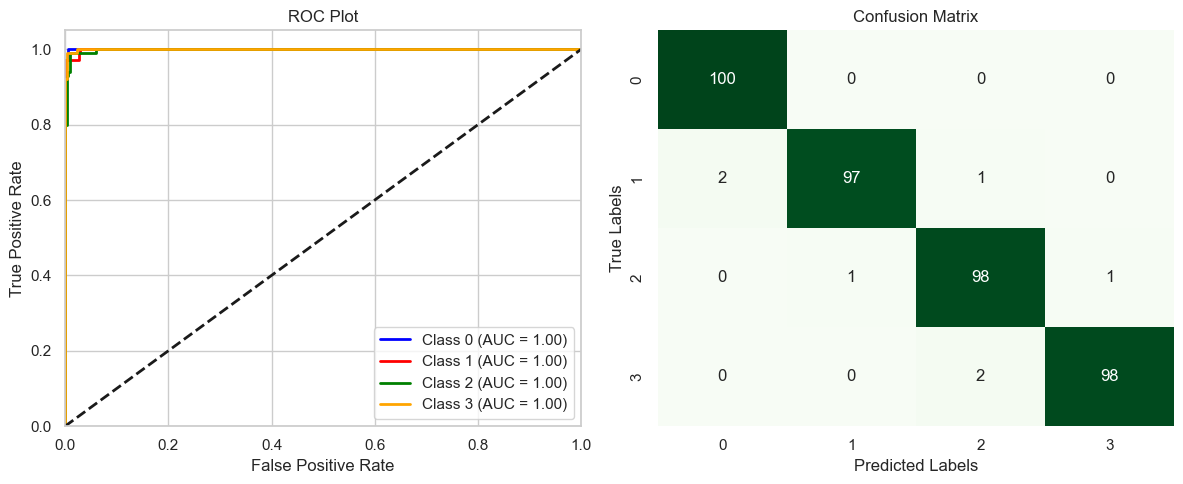

In [103]:
evaluation(best_model_SVM,x_train,x_test,y_train,y_test)

In [104]:
DF_C

CV Mean       Std
Cross Validation Accuracy   0.969375  0.014909

In [105]:
svm_result = metrics_calculator(best_model_SVM, x_test, y_test, 'SVM')

<a id="best_model"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:15px 50px; padding:10px">Step 9: Best Model🏆 </p>

⬆️[Tabel of Contents](#contents_tabel)

In [106]:
results = pd.concat([svm_result,dt_result, rf_result] , axis=1).T  

# Sort the dataframe in descending order based on accuracy
results.sort_values(by='Accuracy', ascending=False, inplace=True)

# Color the accuracy column
results.style.applymap(lambda x: 'background-color: #bdf0e6;', subset='Accuracy')

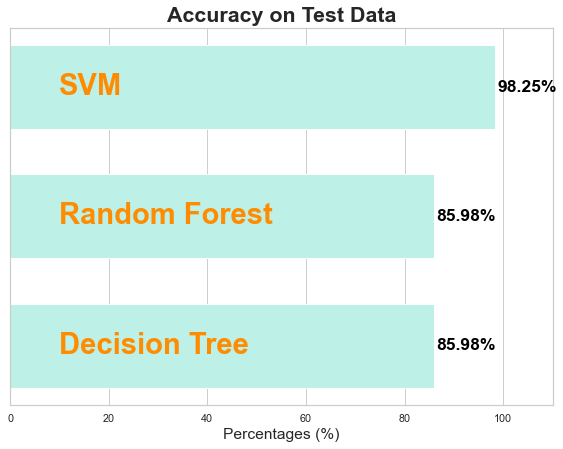

In [107]:
results.sort_values(by='Accuracy', ascending=True, inplace=True)
accuracies = results['Accuracy'].str.strip('%').astype(float)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(10, 7), dpi=70)
ax.barh(results.index, accuracies, color='#bdf0e6', height=0.65)

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(accuracies, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='black', fontsize=18)
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='#ff8c00', fontsize=30)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0,110])

# Add title and xlabel
plt.title("Accuracy on Test Data", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

<h2 align="left"><font color=#ff8c00>Information:</font></h2>

* As you can see, the **SVM model had the highest accuracy of 98%**
* Therefore, our **final model will be SVM.**

<a id="Estimating"></a>
# <p style="background-color:#bdf0e6; font-family:calibri; font-size:130%; color:#ff8c00; text-align:center; border-radius:15px 50px; padding:10px">Step 10: Estimating the prices of mobile phones </p>

⬆️[Tabel of Contents](#contents_tabel)

In [108]:
x= df.drop('price_range', axis=1)
y= df['price_range']

scaler = StandardScaler()
final_svm=SVC(C= 51, kernel='linear' ,probability=True, random_state=0)

pipeline = make_pipeline(scaler, svm)
pipeline.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True, random_state=0))])

In [109]:
data_test['Price']=pipeline.predict(data_test)
data_test['Price']

0      3
1      3
2      2
3      3
4      1
      ..
995    1
996    1
997    1
998    2
999    2
Name: Price, Length: 1000, dtype: int64

In [110]:
data_test.head(5)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  ...        226      1412  3476    12     7          2   
1        191        5  ...        746       857  3895     6     0          7   
2        186        3  ...       1270      1366  2396    17    10         10   
3         96        8  ...        295      1752  3893    10     0          7   
4        108        6  ...        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  Price  
0        0             1     0      3  
1        1             0     0      3  
2        0             1     1      2  
3        1             1     0      3  
4        1             0     1      1  

[5 rows x 21 columns]

<div style="border-radius:10px; padding: 15px; background-color: #bdf0e6; font-size:110%; text-align:left">

* **Thank you for taking the time to consider this matter**
* The programmer of this project: **Amir Salmasi**

<h2 align="left"><font color=#ff8c00>Best Regards🙏</font></h2>